# Lead Scoring Case Study

### Goal
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Supress Warnings

In [7]:
import warnings
warnings.filterwarnings('ignore')


### Importing libraries

In [8]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import uniform
from math import isnan

#visualisation
from matplotlib.pyplot import xticks
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Data display coustomization

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Reading the Input Data

In [9]:
leads = pd.read_csv("Leads.csv",  sep = ',',encoding = "ISO-8859-1")

leads_copy=leads.copy()

leads.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Overview of the Dataframe 

## Shape of the Input

In [10]:
leads.shape
print ('The Input Data has {0} rows and {1} columns'.format(leads.shape[0],leads.shape[1])) 

The Input Data has 9240 rows and 37 columns


## Basic Information of the Features

In [11]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Descriptive Statistivs 

In [12]:
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


### Current conversion Rate:

Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

In [13]:
Conversion_rate = (sum(leads['Converted'])/len(leads['Converted'].index))*100
print("The conversion rate of leads is: ",Conversion_rate)

The conversion rate of leads is:  38.53896103896104


#  Data Cleaning 

### Duplicates Check 

In [14]:
# removing duplicate rows
leads.drop_duplicates(subset='Lead Number')
print ('The Input Data after Duplicate check has {0} rows and {1} columns'.format(leads.shape[0],leads.shape[1])) 

The Input Data after Duplicate check has 9240 rows and 37 columns


#### Inference: There is no Duplicates 

### Dropping Unecessary Columns

### Check for columns with only null vlaues:

In [15]:
leads.isnull().all(axis=0).any()

False

### Dropping all columns with only 0 values:

In [16]:
leads.loc[:, (leads != 0).any(axis=0)]
print ('The Input Data after droping columns with only 0 values has {0} rows and {1} columns'.format(leads.shape[0],leads.shape[1])) 

The Input Data after droping columns with only 0 values has 9240 rows and 37 columns


### Check for unique values in all features 

In [17]:
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

Those features which have only one unique value are :
- Magazine
- Recieve More updates about the course
- Update me on Supply chain content
- Get updates on DM content
- I agree to pay the amount through cheque 

These features show no variance and thus all the leads have chosen one option, thus this feature doesnt make any impact or difference on conversion of leads.

### Remove columns which has only one unique value


In [18]:
leads= leads.loc[:,leads.nunique()!=1]
print ('The Input Data after droping columns with only one unique values has {0} rows and {1} columns'.format(leads.shape[0],leads.shape[1])) 

The Input Data after droping columns with only one unique values has 9240 rows and 32 columns


### Dropping the columns 'Prospect ID' as it will not have any effect in the predicting model

In [19]:
leads = leads.drop(['Prospect ID','Lead Number'], axis=1)

### Drop the following features - These variables are created after contacting the Student(Customer)

In [20]:
leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index',
           'Asymmetrique Activity Score','Asymmetrique Profile Score',
           'Tags','Lead Quality','Lead Profile'], 1, inplace = True)

### Handling missing values

### Replacing 'Select' values to NAN in the Dataframe 

In [21]:
# As we can observe that there are select values for many column. This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.
# Converting 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

### Features/Columns with precentage of null values 

In [22]:
total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
How did you hear about X Education,7250,78.46
City,3669,39.71
Specialization,3380,36.58
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39


### Visualisng the Null values 

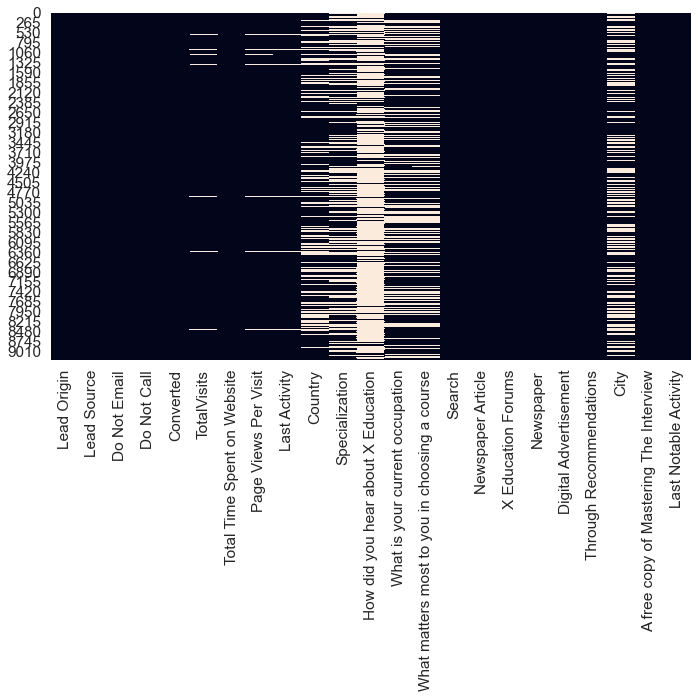

In [23]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.4)
sns.heatmap(leads.isnull(), cbar=False)
plt.tight_layout()
plt.show()

### Drop columns having more than 45% NA values.

In [24]:
leads = leads.drop(leads.loc[:,list(round(100*(leads.isnull().sum()/len(leads.index)), 2)>45)].columns, 1)

### Features/Columns with precentage of null values after dropping values > 45%

In [25]:
total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
City,3669,39.71
Specialization,3380,36.58
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
Do Not Email,0,0.00


### Handling the remaining null values with ref to the above output  

### City

Descriptive Statistics for City:
-------------------------
count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object
*************************************
Value counts 
----------------
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
*************************************
City countplot 
----------------


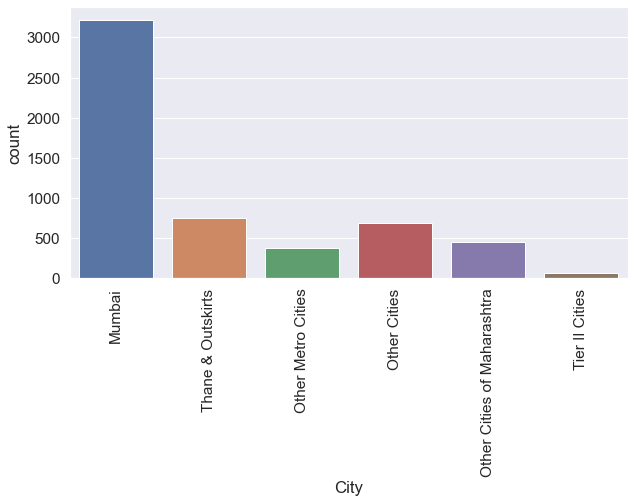

In [26]:
print('Descriptive Statistics for City:')
print('-------------------------')
print(leads['City'].describe())

print('*************************************')

print('Value counts ')
print('----------------')
print(leads['City'].value_counts())
print('*************************************')

print('City countplot ')
print('----------------')
plt.figure(figsize = (10,5))
ax= sns.countplot(leads['City'])
plt.xticks(rotation = 90)
plt.show()


### Inference: 

- More than 50% of the data available  is Mumbai so we can impute Mumbai in the missing values.

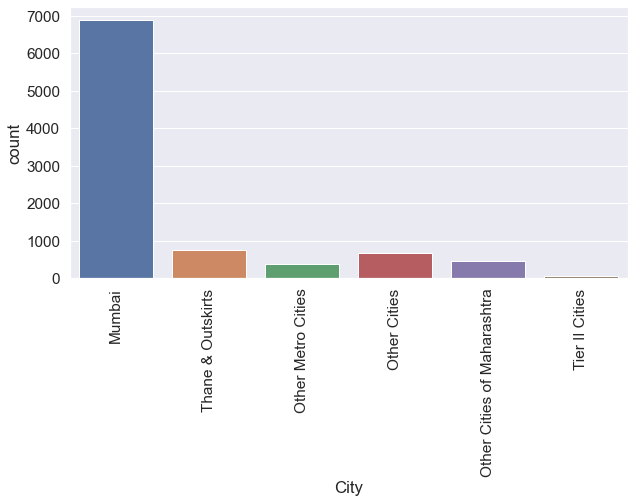

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


In [27]:
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

plt.figure(figsize = (10,5))
ax= sns.countplot(leads['City'])
plt.xticks(rotation = 90)
plt.show()
print(leads['City'].value_counts())

### Specialization

Descriptive Statistics for Specialization:
-------------------------
count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object
*************************************
Value counts 
----------------
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Exce

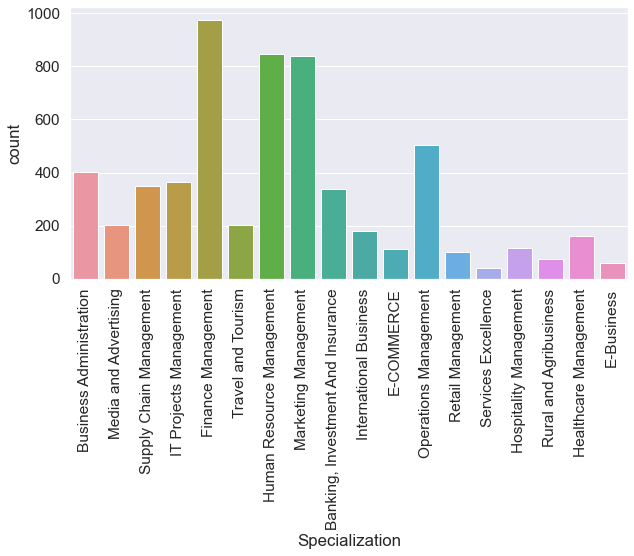

In [28]:
print('Descriptive Statistics for Specialization:')
print('-------------------------')
print(leads['Specialization'].describe())

print('*************************************')

print('Value counts ')
print('----------------')
print(leads['Specialization'].value_counts())
print('*************************************')

print('Specialization countplot ')
print('----------------')
plt.figure(figsize = (10,5))
ax= sns.countplot(leads['Specialization'])
plt.xticks(rotation = 90)
plt.show()


### Inference: 
 - It maybe a case that leads had not entered any specialization if option is not availabe on the list,may not have any specialization or is a student.Hence we can make a category "Others" 

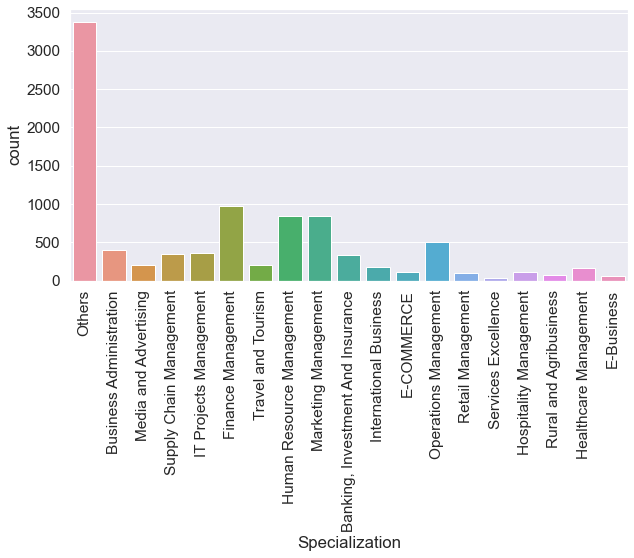

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


In [29]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')
plt.figure(figsize = (10,5))
ax= sns.countplot(leads['Specialization'])
plt.xticks(rotation = 90)
plt.show()

print(leads['Specialization'].value_counts())

### What matters most to you in choosing a course

Descriptive Statistics for What matters most to you in choosing a course:
-------------------------
count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object
*************************************
Value counts 
----------------
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
*************************************
What matters most to you in choosing a course countplot 
----------------


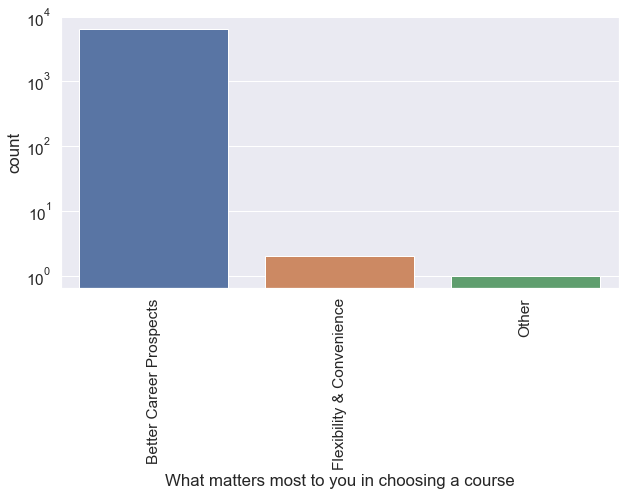

In [30]:
print('Descriptive Statistics for What matters most to you in choosing a course:')
print('-------------------------')
print(leads['What matters most to you in choosing a course'].describe())

print('*************************************')

print('Value counts ')
print('----------------')
print(leads['What matters most to you in choosing a course'].value_counts())
print('*************************************')

print('What matters most to you in choosing a course countplot ')
print('----------------')
plt.figure(figsize = (10,5))
ax= sns.countplot(leads['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()


In [31]:
leads= leads.drop(['What matters most to you in choosing a course'],axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Others,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified


### Inference:

- Since the feature  What matters most to you in choosing a course is highly skewed to Better Career Prospects we are dropping the feature 

### What is your current occupation

Descriptive Statistics for What is your current occupation:
-------------------------
count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object
*************************************
Value counts 
----------------
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
*************************************
What is your current occupation countplot 
----------------


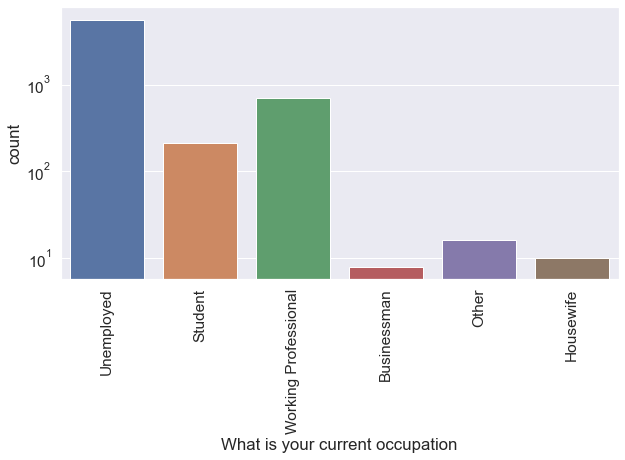

In [32]:
print('Descriptive Statistics for What is your current occupation:')
print('-------------------------')
print(leads['What is your current occupation'].describe())

print('*************************************')

print('Value counts ')
print('----------------')
print(leads['What is your current occupation'].value_counts())
print('*************************************')

print('What is your current occupation countplot ')
print('----------------')
plt.figure(figsize = (10,5))
ax= sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

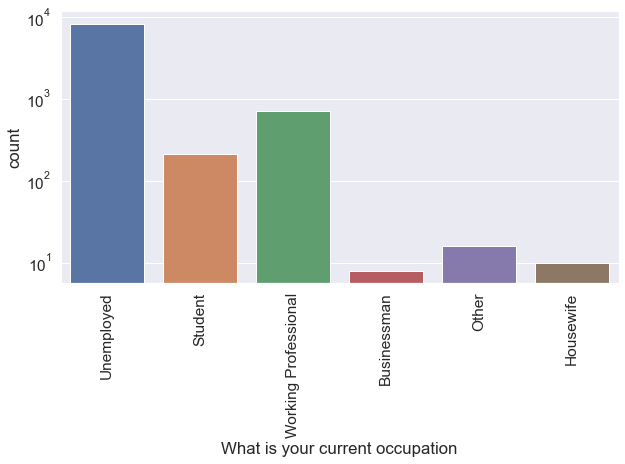

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [33]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')
plt.figure(figsize = (10,5))
ax= sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()
print(leads['What is your current occupation'].value_counts())

### Country

Descriptive Statistics for Country:
-------------------------
count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object
*************************************
Value counts 
----------------
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Italy                      2
Belgium                    2
China                      2
Ghana                      2
Netherlands                2
Bangladesh                 2
Asia/Pacific Region        2
Philippines           

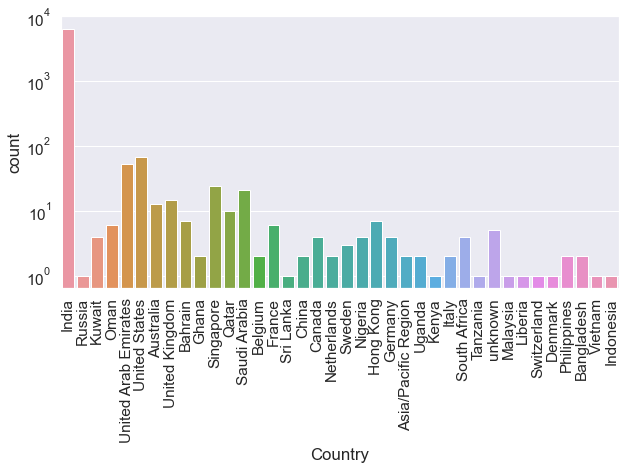

In [34]:
print('Descriptive Statistics for Country:')
print('-------------------------')
print(leads['Country'].describe())

print('*************************************')

print('Value counts ')
print('----------------')
print(leads['Country'].value_counts())
print('*************************************')

print('Country countplot ')
print('----------------')
plt.figure(figsize = (10,5))
ax= sns.countplot(leads['Country'])
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Inference:
   - Country is India for most values so it is skewed towards India. Hence we drop the same. 

In [35]:
leads= leads.drop(['Country'],axis=1)

### Check percentage of the columns again 

In [36]:
total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
Last Notable Activity,0,0.00
A free copy of Mastering The Interview,0,0.00
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
Total Time Spent on Website,0,0.00


### Inference : 
   - We have around 4 variables with very less null values. So, we can drop the null values simply 

### Drop the remaining null values less than 1.5%

In [37]:
leads.dropna(inplace = True)

### Check percentage of the columns again 

In [38]:
total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Last Notable Activity,0,0.0
A free copy of Mastering The Interview,0,0.0
Lead Source,0,0.0
Do Not Email,0,0.0
Do Not Call,0,0.0
Converted,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0
Page Views Per Visit,0,0.0
Last Activity,0,0.0


### Inference : 
   - Now, we have handled all the missing values in the data frame . Now, we will split the columns as categorical and numerical columns 

### Divide the data into Numeric and categorical data  

In [39]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# NUMERIC
numdata=leads[list(leads.select_dtypes(numerics).columns)]
# CATEGORICAL 
catdata=leads[list(leads.select_dtypes(exclude=numerics).columns)]
print('***************************************************')
print('---------------------------------------------------')
print('Dviding the Features as Numerical and Categorical ')
print('---------------------------------------------------')

print('Categorical Columns')
print('---------------------------------------------------')

print(catdata.columns)
print('---------------------------------------------------')

print('Numerical Columns')
print('---------------------------------------------------')

print(numdata.columns)
print('---------------------------------------------------')
print('****************************************************')

***************************************************
---------------------------------------------------
Dviding the Features as Numerical and Categorical 
---------------------------------------------------
Categorical Columns
---------------------------------------------------
Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')
---------------------------------------------------
Numerical Columns
---------------------------------------------------
Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')
---------------------------------------------------
*********************************************

### Data Retained for EDA

In [40]:
Data_retained_EDA= len(leads)* 100 / len(leads_copy)
print("{} % of original rows is available for EDA".format(round(Data_retained_EDA,2)))

98.2 % of original rows is available for EDA


### Shape of Data after Data Cleaning

# Exploratory Data Analysis 

# Univariate Analysis - Categorical Columns 

In [41]:
catdata.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [42]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        

In [43]:
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

# Let's keep considerable last activities as such and club all others to "Other_Activity"
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                                                      'Other_Activity')


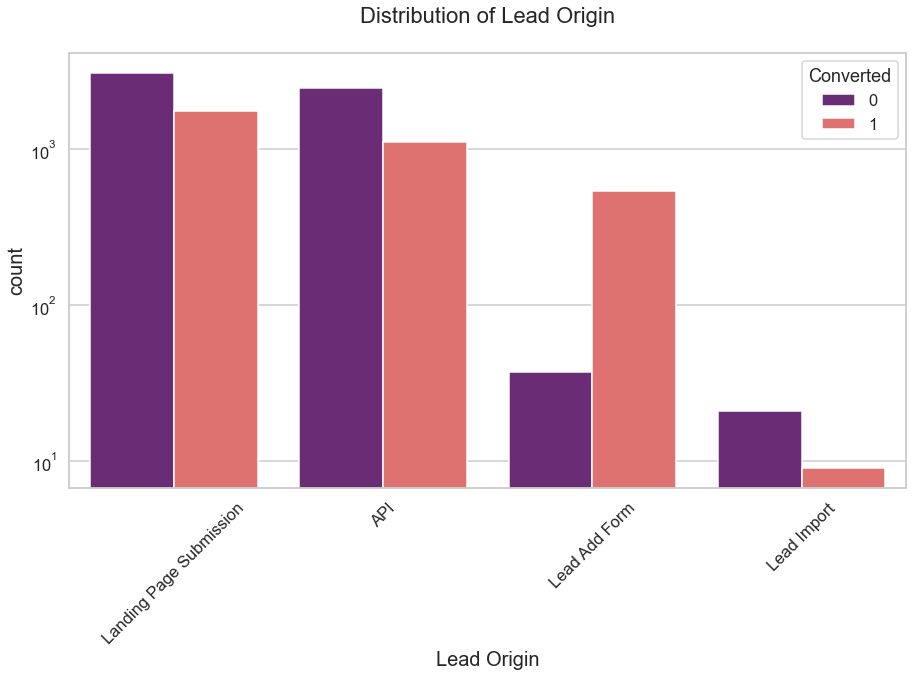

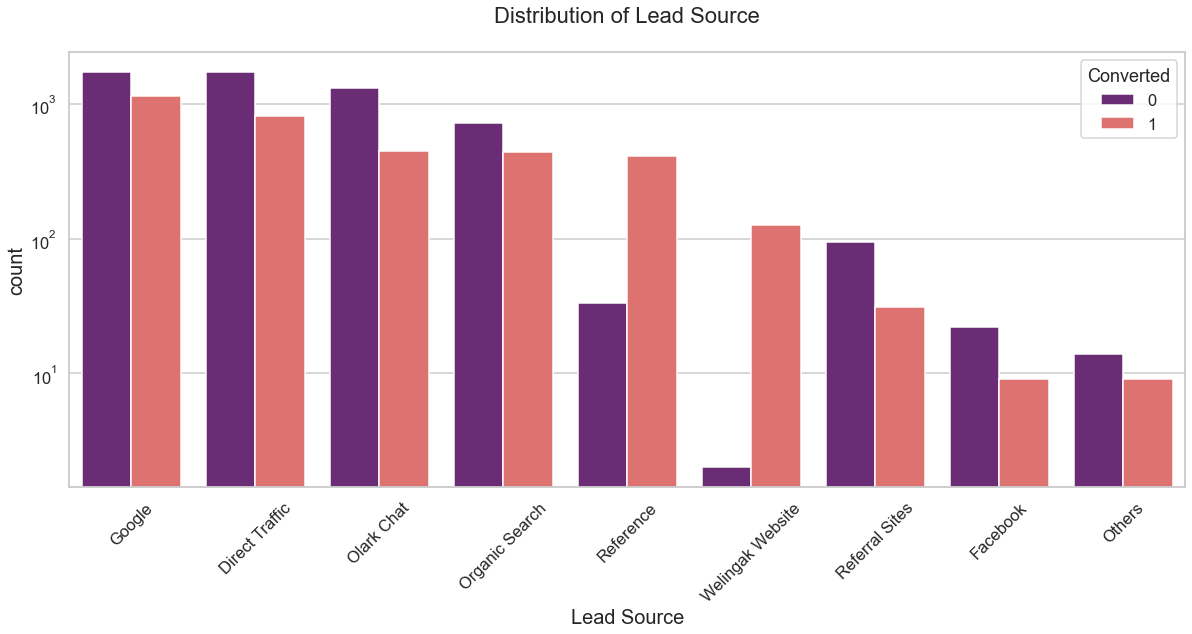

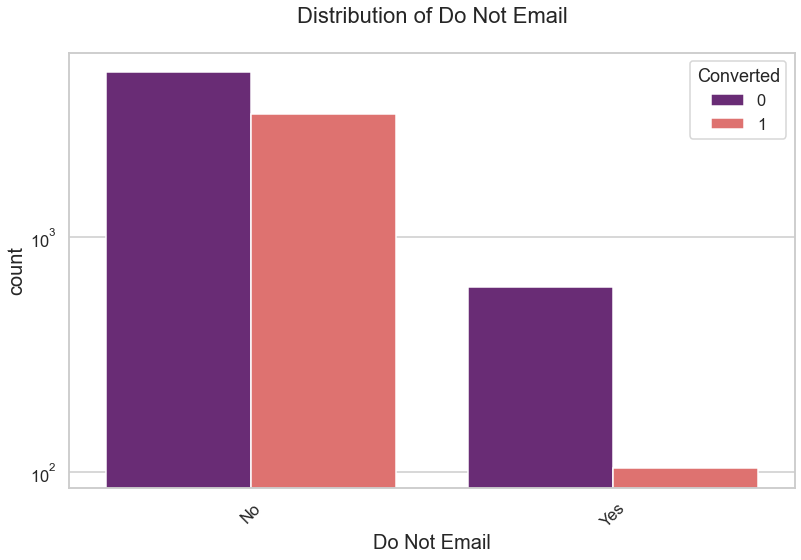

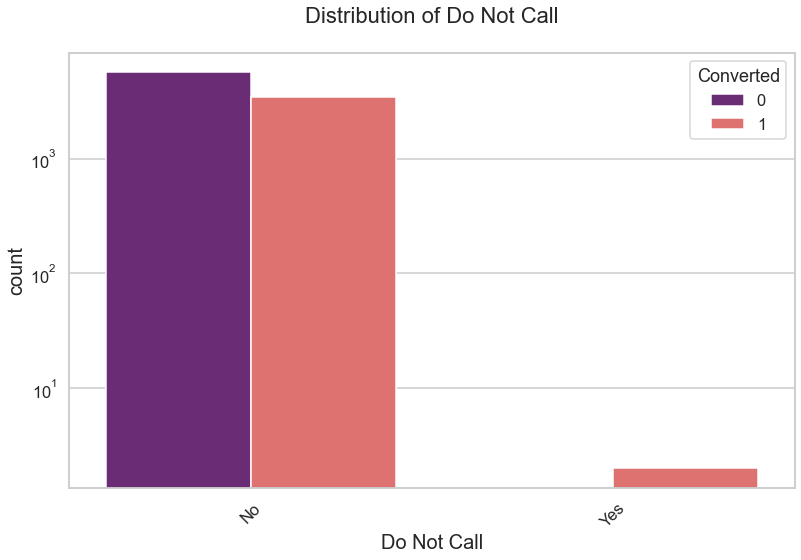

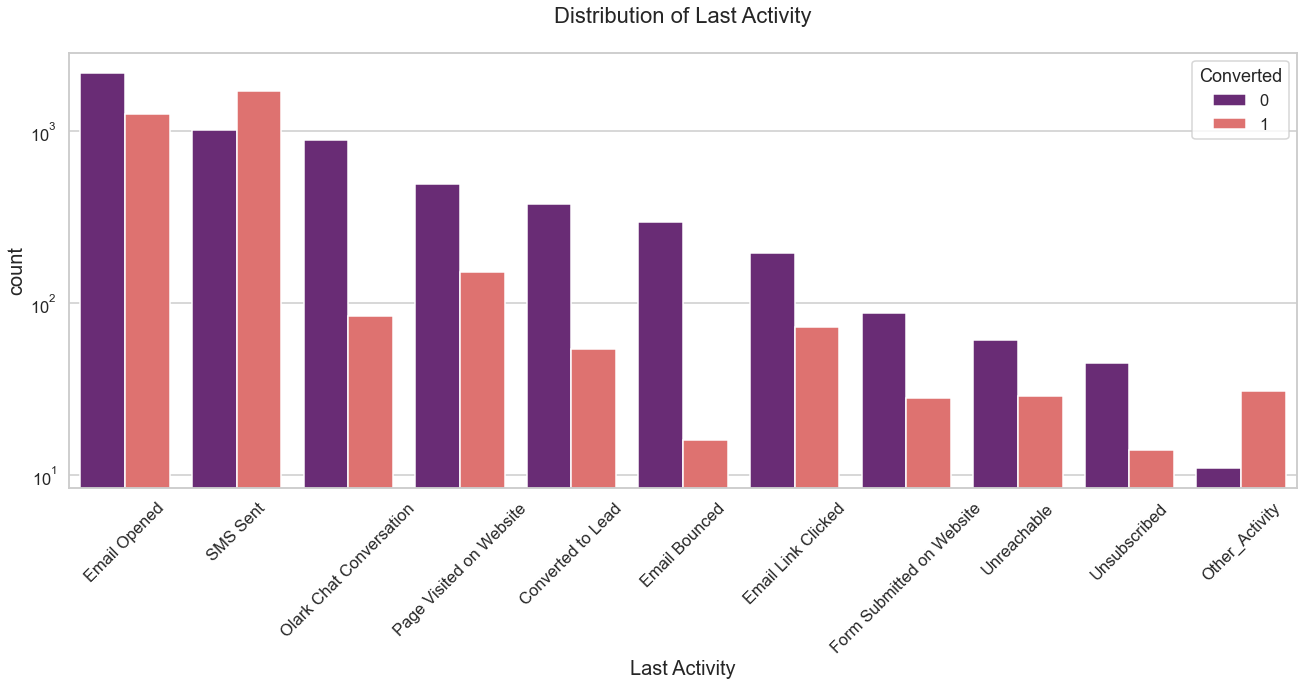

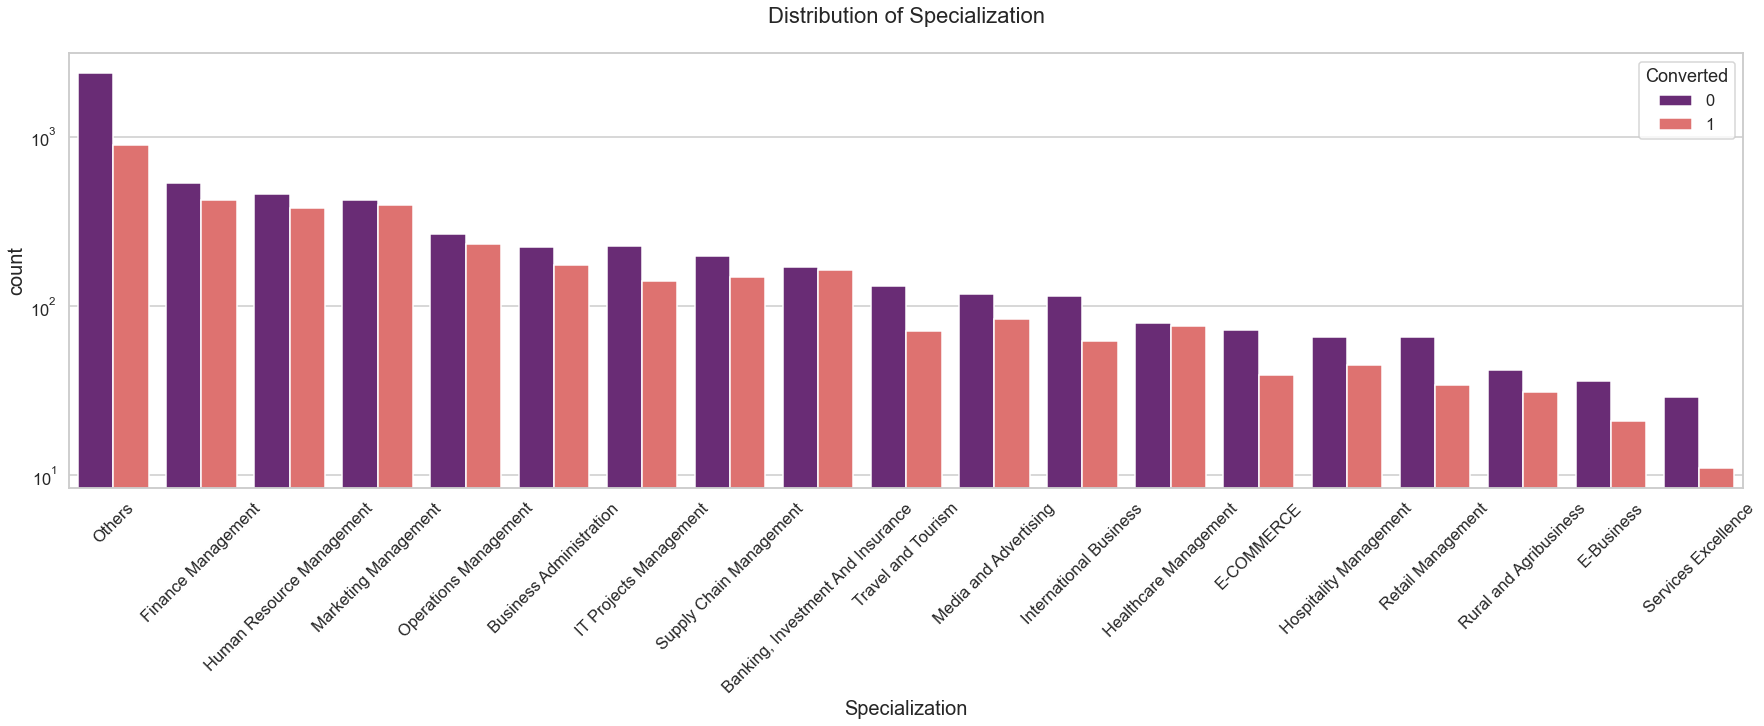

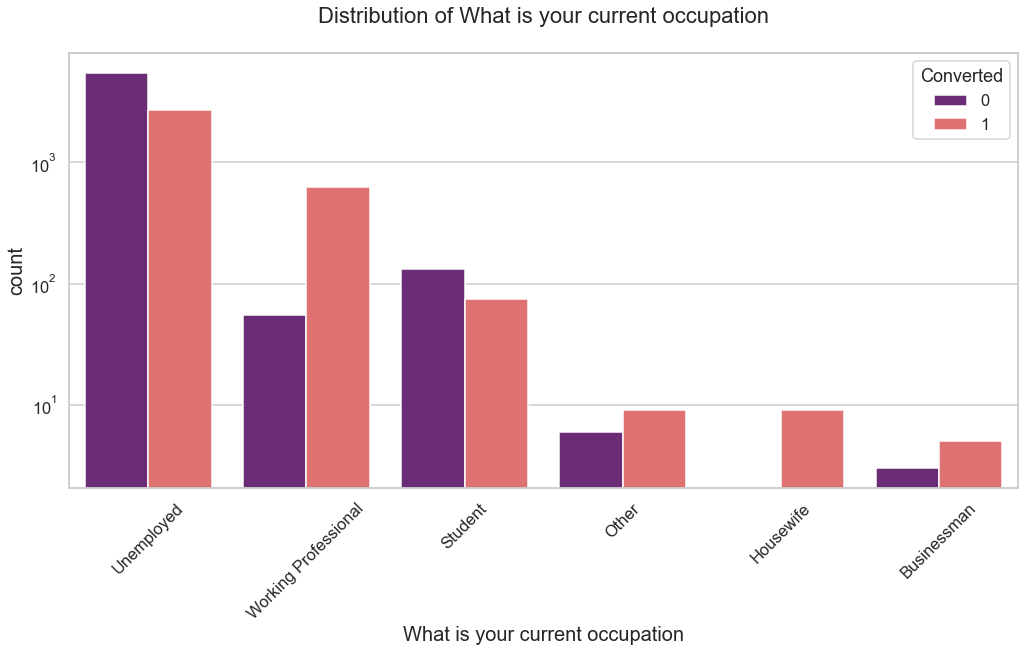

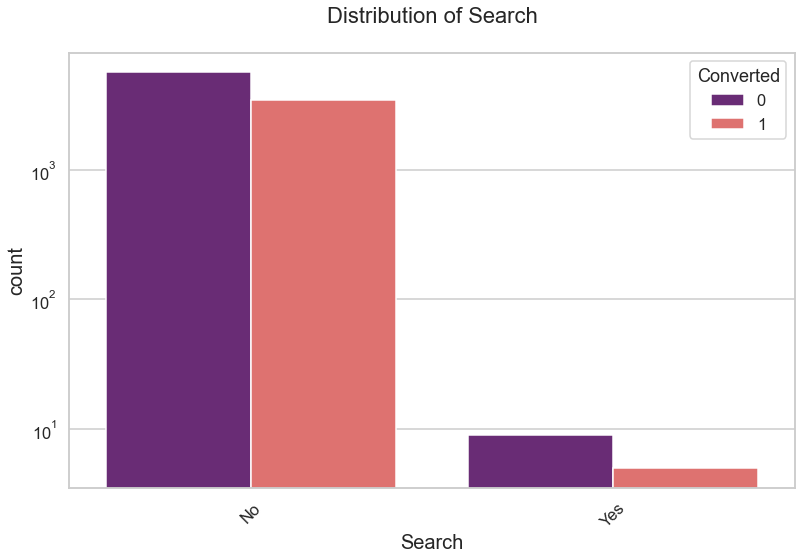

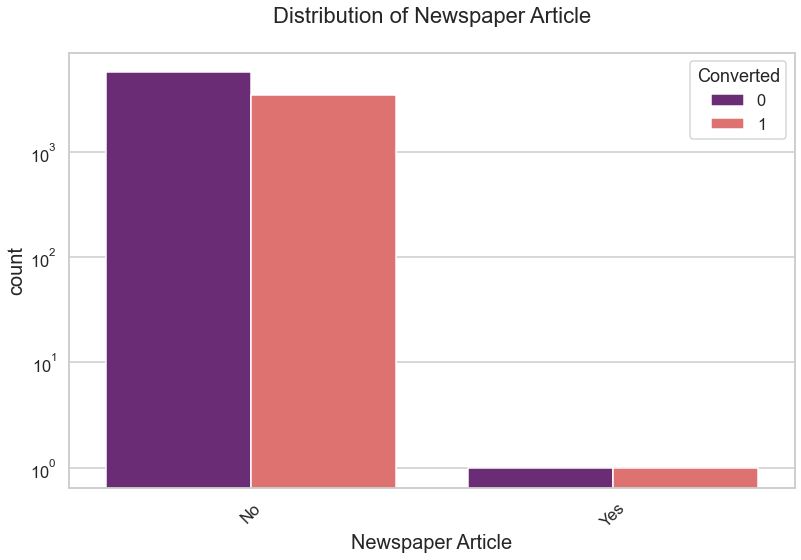

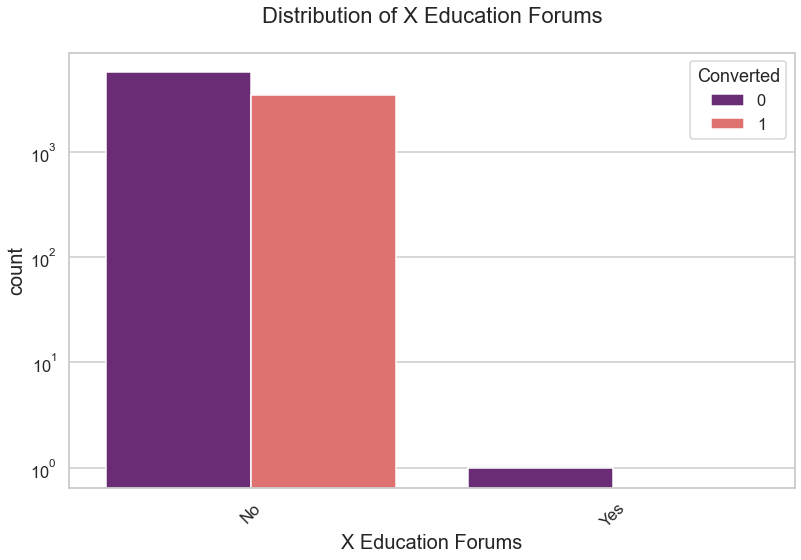

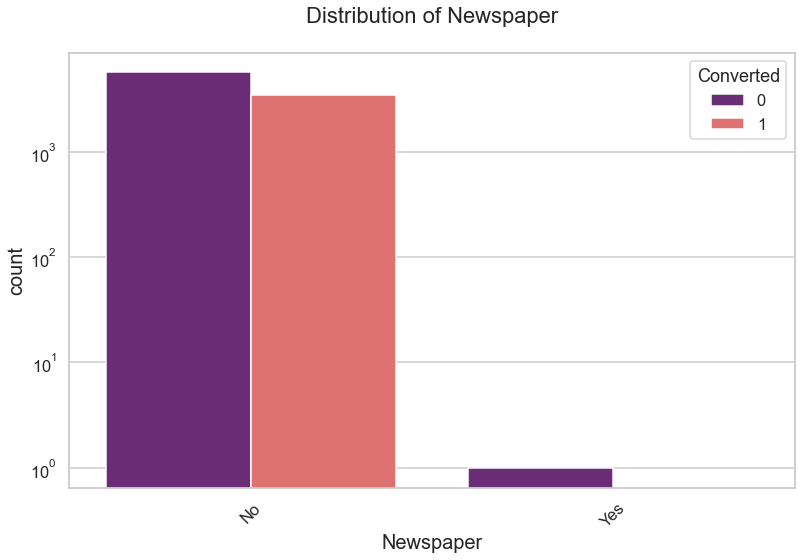

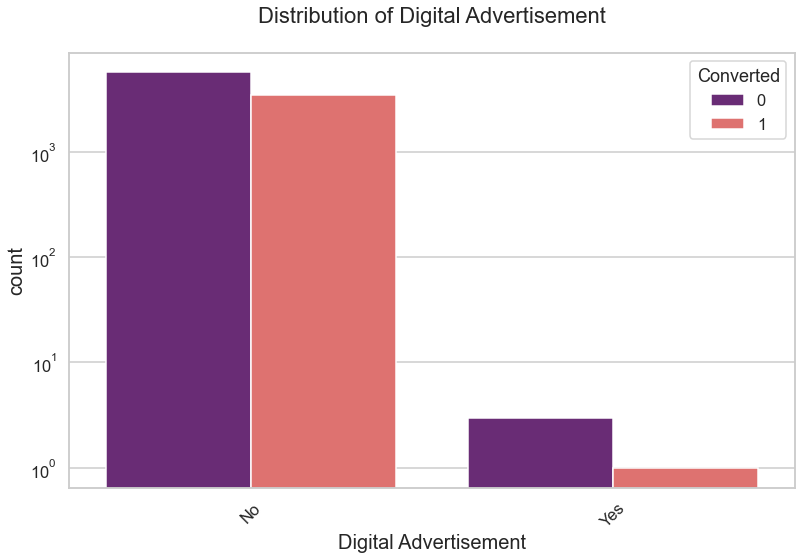

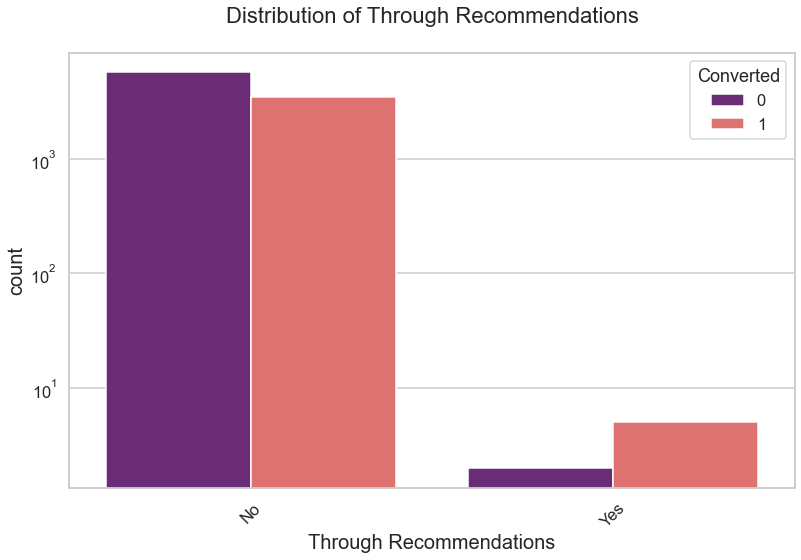

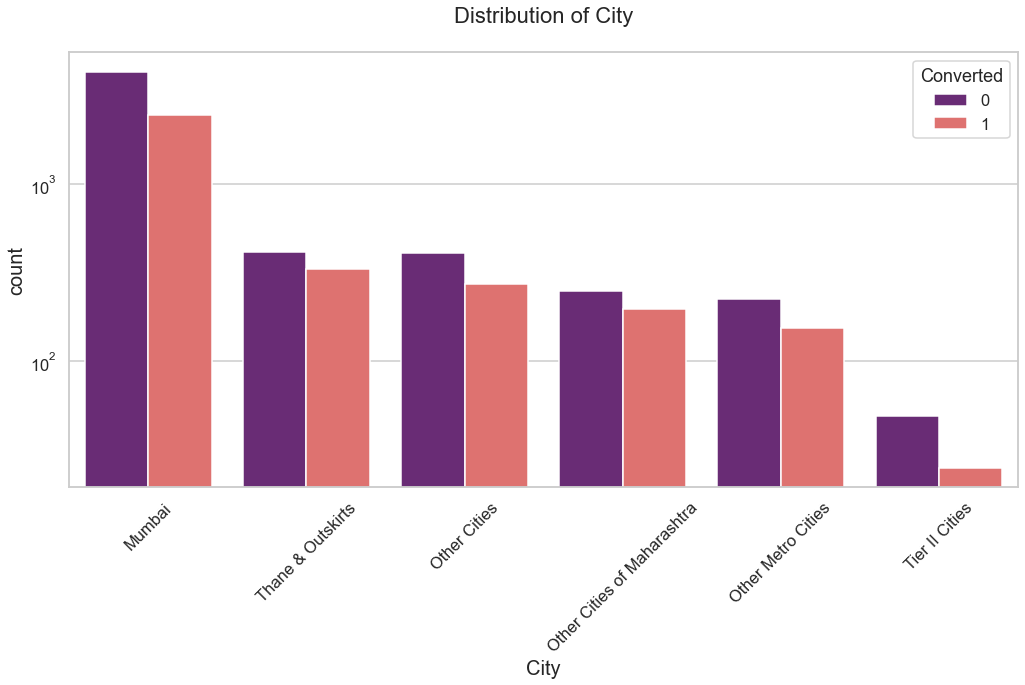

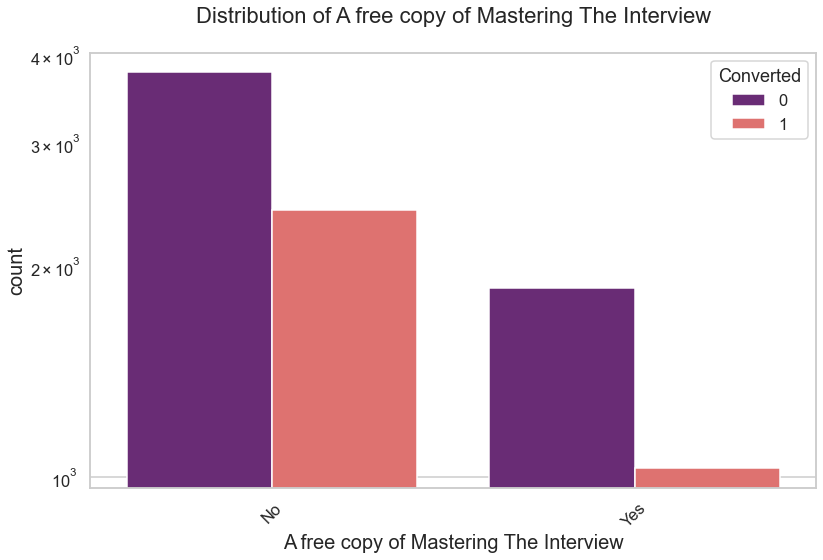

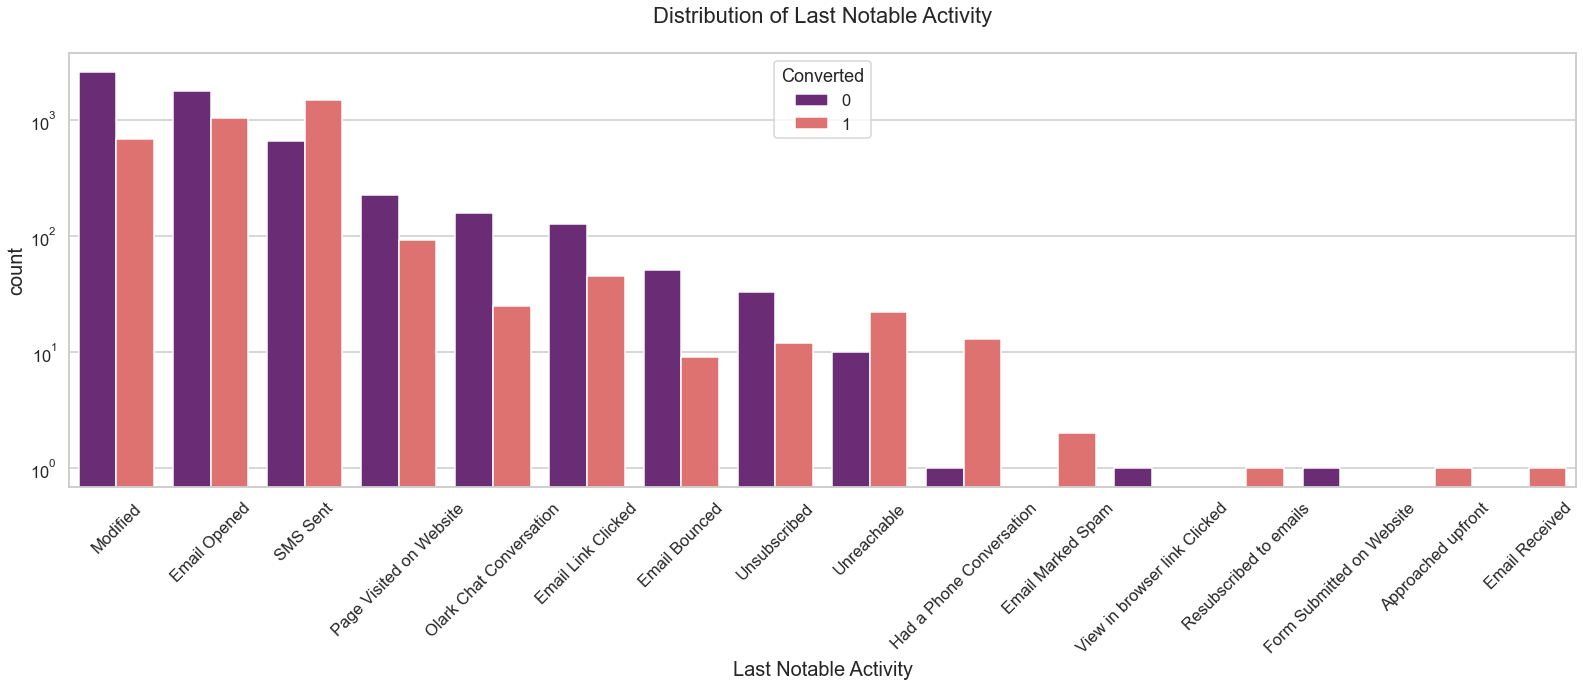

In [44]:
for columns in catdata:
  uniplot(leads,col=columns,title='Distribution of {0}'.format(columns),hue='Converted')

### Inferences: Univariate Analysis Categorical Features 

#### Distribution Of Lead Origin 

   - Landing page submission is comparitvely high then the rest of the categories in lead origin 
   - lead import is the least category which is quantified in lead origin
   - Landing page submission and APO helps in lead conversion than the rest of the categories 
   - Lead add form has high certainity in lead conversion 
#### Distribution of Lead Source 

   - Google is is the best lead source among all other categories in the lead source
   - Direct Traffice, Olark Chat and Organic Search are some of the best entities in lead source 
   - The best category for lead conversion is Reference and Welingak Website among all the lead source categories 
   - To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.
   
#### Distribution of Do Not Email 

   - The customers who opted out of email communication is high
   - lead conversion through email has less certainity unlike other categories 
   
#### Distribution of Do Not Call 

   - The customers who opted out of call communication is high
   - lead conversion through call has less certainity unlike other categories
   
#### Distribution of Last Activity 

   - Most of the lead have their Email opened as their last activity.
   - Conversion rate for leads with last activity as SMS Sent is almost 62%.
   
   
#### Distribution of Specialziation 

   - Focus should be more on the Specialization with high conversion rate like Supply Chain , Human Resource and Finance
   

#### Distribution of Occupation 

- Working Professionals going for the course have high chances of joining it.
   - Unemployed leads are the most in numbers but has around 30-35% conversion rate.
   
   
#### Distribution of Search 

   - Most entries are 'No'. No Inference can be drawn with this parameter.
   
#### Similar to Distribution of Search , No Inference can be drawn from the following features 

   - Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations'
   
####  Distribution Of City 

  - Most leads are from mumbai with around 30% conversion rate.
   
#### Distribution of Last notable Activity 

   - SMS Sent' is strong entity for positive lead
   
 
  ### Results from Univariate Analysis for Categorical Features : 
 
 Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis
  

In [45]:
leads = leads.drop(['Do Not Email','Do Not Call','Search',
                 'Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'],1)

### Shape of Data after Univariate EDA - Categorical Columns 

In [46]:
print ('Shape of Data after Univariate EDA - Categorical Columns has {0} rows and {1} columns'.format(leads.shape[0],leads.shape[1])) 

Shape of Data after Univariate EDA - Categorical Columns has 9074 rows and 11 columns


#### Basic information of Features after Univariate EDA - Categorical Columns  

In [47]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Converted                        9074 non-null   int64  
 3   TotalVisits                      9074 non-null   float64
 4   Total Time Spent on Website      9074 non-null   int64  
 5   Page Views Per Visit             9074 non-null   float64
 6   Last Activity                    9074 non-null   object 
 7   Specialization                   9074 non-null   object 
 8   What is your current occupation  9074 non-null   object 
 9   City                             9074 non-null   object 
 10  Last Notable Activity            9074 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.1+ MB


# Univariate Analysis - Numerical Columns 

In [48]:
numdata.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

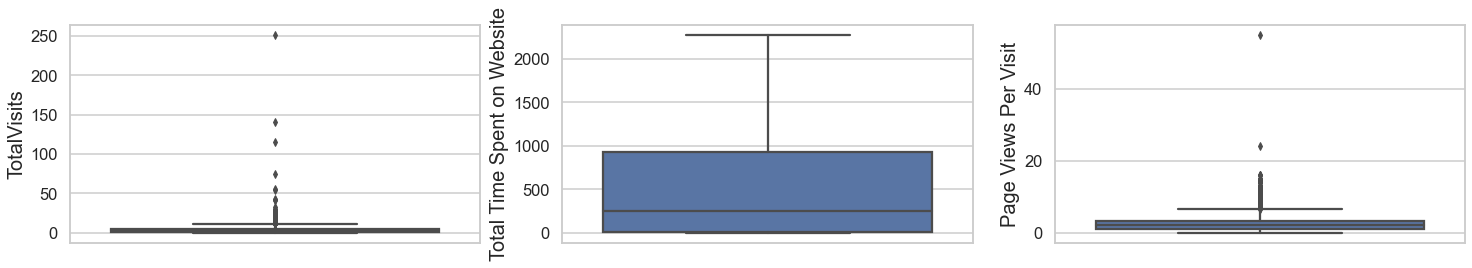

In [49]:
### Box plotting for univariate variables analysis in logarithmic scale
#Ditribution for some of the numerical features.
plt.figure(figsize=(25,4))
plt.subplot(1,3,1)
plt.tick_params(axis='both', which='minor', labelsize=8)
sns.boxplot(y=leads['TotalVisits'])
plt.subplot(1,3,2)

sns.boxplot(y=leads['Total Time Spent on Website'])
plt.subplot(1,3,3)

sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

We can clearly spot outliers in the features such as TotalVisits and Page Views Per Visit. Total time spent on Website doesn't have any outliers. We can see that there are as many as 250 visits recorded for total visits by possible leads. As high as this number of visits to a website seems to be not like a correct capture and hence we can remove these outliers. Similarly for the page views per visit, as many as 20+ page views in a single visit seems to be not correct. We can remove these as well.!

### Outlier Treatment  

In [50]:
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values 
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]]=percentiles[1]

percentiles = leads['Total Time Spent on Website'].quantile([0.05,0.95]).values 
leads['Total Time Spent on Website'][leads['Total Time Spent on Website'] >= percentiles[1]]=percentiles[1]

percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values 
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]]=percentiles[1]

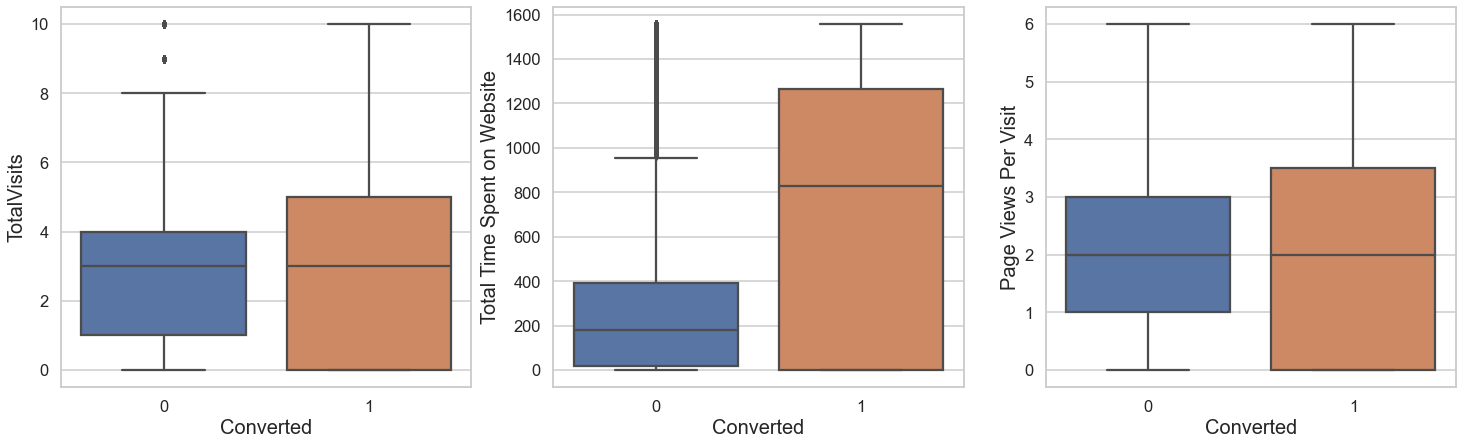

In [51]:
#Ditribution for some of the numerical features after treatment of Outliers 
plt.figure(figsize=(25,7))
plt.subplot(1,3,1)

sns.boxplot(y=leads['TotalVisits'], x = leads['Converted'])
plt.subplot(1,3,2)

sns.boxplot(y=leads['Total Time Spent on Website'], x= leads['Converted'])
plt.subplot(1,3,3)

sns.boxplot(y=leads['Page Views Per Visit'], x= leads['Converted'])
plt.show()


### Inferences: 

#### Total Visits:

  - Median for converted and not converted leads are the same.
  - Nothng conclusive on the basis of Total Visits.
  
#### Total Time Spent on Website 

  - Leads spending more time on the weblise are more likely to be converted.
  - Website should be made more engaging to make leads spend more time.
  
#### Page Views Per Visit

  - Nothing can be said specifically for lead conversion from Page Views Per Visit

## Bi-Variate Analysis 

<Figure size 2160x3600 with 0 Axes>

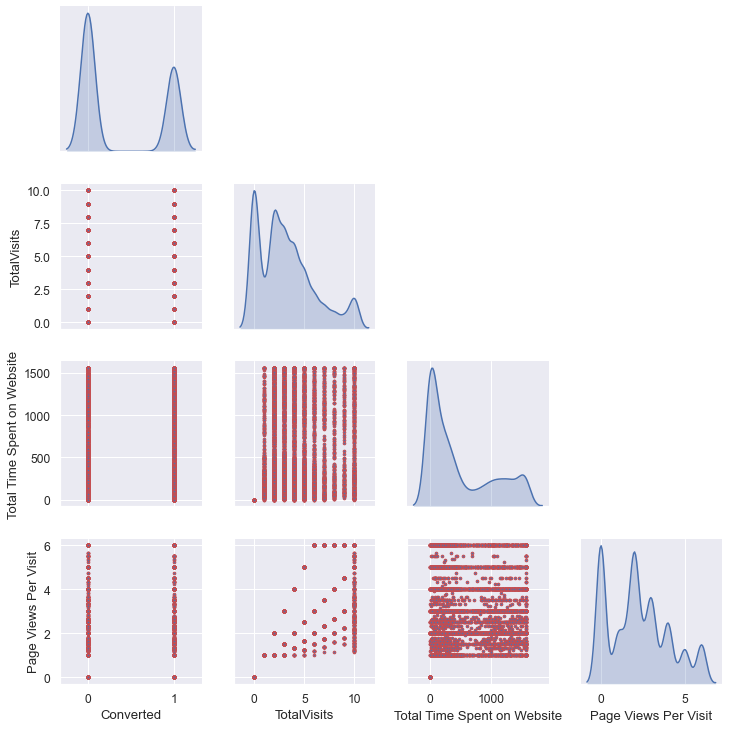

In [52]:
plt.figure(figsize=(30,50))
sns.set(font_scale=1.1)
pair_plot=sns.pairplot(leads,diag_kind='kde',corner=True,plot_kws=dict(s=7, edgecolor="r", linewidth=1))

#### Inferences : 

The Data is skewed and we could witness a lot of noise in the data.


### Correlation Plot to check Multi- Collinearity 

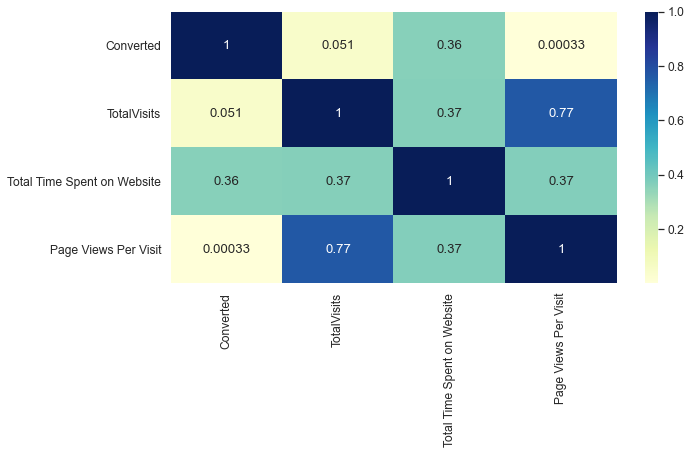

In [53]:
plt.figure(figsize = (10,5))
sns.heatmap(leads.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Inference: 

 - Total Visits and Page views per Visit has high correlation than other features. 
 - Total visits and converted has very low correlatio result which means that based on total visit we can derive meaningful lead scoring 
 - Total visits and Total Time spent on Website have a reasonable correlation result
 - There is positive correlation between Total Time Spent on Website and Conversion
 - There is almost no correlation in Page Views Per Visit and TotalVisits with Conversion
    

### Data Statistics after EDA 

In [54]:
print("Original Columns Retained :{} % ".format(round((100* len(leads.columns)/len(leads_copy.columns)),2)))
print("Original Rows    Retained :{} % ".format(round((len(leads)*100)/len(leads_copy),2)))
print("Original Data    Retained :{} % ".format(round((len(leads) * 
                                                     len(leads.columns))*100/(len(leads_copy.columns)*len(leads_copy)),2)))
print ('The Shape of Data after EDA  has {0} rows and {1} columns'.format(leads.shape[0],leads.shape[1])) 

Original Columns Retained :29.73 % 
Original Rows    Retained :98.2 % 
Original Data    Retained :29.2 % 
The Shape of Data after EDA  has 9074 rows and 11 columns


# Data Preperation 

## Check for Sample data from the Dataframe 

In [55]:
leads.head(10)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified
5,API,Olark Chat,0,0.0,0,0.0,Olark Chat Conversation,Others,Unemployed,Mumbai,Modified
6,Landing Page Submission,Google,1,2.0,1557,2.0,Email Opened,Supply Chain Management,Unemployed,Mumbai,Modified
7,API,Olark Chat,0,0.0,0,0.0,Olark Chat Conversation,Others,Unemployed,Mumbai,Modified
8,Landing Page Submission,Direct Traffic,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,Thane & Outskirts,Email Opened
9,API,Google,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,Mumbai,Email Opened


### Create a list of categorical variables with more than 2 categories for dummy variable creation

In [56]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# NUMERIC
num_data=leads[list(leads.select_dtypes(numerics).columns)]
# CATEGORICAL 
cat_data=leads[list(leads.select_dtypes(exclude=numerics).columns)]
print('***************************************************')
print('---------------------------------------------------')
print('Dviding the Features as Numerical and Categorical ')
print('---------------------------------------------------')

print('Categorical Columns')
print('---------------------------------------------------')

print(cat_data.columns)
print('---------------------------------------------------')

print('Numerical Columns')
print('---------------------------------------------------')

print(num_data.columns)
print('---------------------------------------------------')
print('****************************************************')

***************************************************
---------------------------------------------------
Dviding the Features as Numerical and Categorical 
---------------------------------------------------
Categorical Columns
---------------------------------------------------
Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')
---------------------------------------------------
Numerical Columns
---------------------------------------------------
Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')
---------------------------------------------------
****************************************************


In [57]:
list_cat_var = []
for column in cat_data:
    _ = leads[column].nunique()
    if _ > 2:
        list_cat_var.append(column)
        print("{:<30} = {}".format(column,_))

Lead Origin                    = 4
Lead Source                    = 9
Last Activity                  = 11
Specialization                 = 19
What is your current occupation = 6
City                           = 6
Last Notable Activity          = 16


### Checking for count of categories in categorical variable

In [58]:
#Createing the function to count of values as per category in column
def column_category_counts(data):
    return pd.DataFrame(data.value_counts(dropna=False))

for column in cat_data:
    print("Column Name : ",column)
    display(column_category_counts(leads[column]).T)

Column Name :  Lead Origin


,Landing Page Submission,API,Lead Add Form,Lead Import
Lead Origin,4885,3578,581,30


Column Name :  Lead Source


,Google,Direct Traffic,Olark Chat,Organic Search,Reference,Welingak Website,Referral Sites,Facebook,Others
Lead Source,2873,2543,1753,1154,443,129,125,31,23


Column Name :  Last Activity


,Email Opened,SMS Sent,Olark Chat Conversation,Page Visited on Website,Converted to Lead,Email Bounced,Email Link Clicked,Form Submitted on Website,Unreachable,Unsubscribed,Other_Activity
Last Activity,3432,2716,972,640,428,312,267,116,90,59,42


Column Name :  Specialization


,Others,Finance Management,Human Resource Management,Marketing Management,Operations Management,Business Administration,IT Projects Management,Supply Chain Management,"Banking, Investment And Insurance",Travel and Tourism,Media and Advertising,International Business,Healthcare Management,E-COMMERCE,Hospitality Management,Retail Management,Rural and Agribusiness,E-Business,Services Excellence
Specialization,3282,959,837,823,499,399,366,346,335,202,202,176,156,111,111,100,73,57,40


Column Name :  What is your current occupation


,Unemployed,Working Professional,Student,Other,Housewife,Businessman
What is your current occupation,8159,677,206,15,9,8


Column Name :  City


,Mumbai,Thane & Outskirts,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Tier II Cities
City,6752,745,680,446,377,74


Column Name :  Last Notable Activity


,Modified,Email Opened,SMS Sent,Page Visited on Website,Olark Chat Conversation,Email Link Clicked,Email Bounced,Unsubscribed,Unreachable,Had a Phone Conversation,Email Marked Spam,View in browser link Clicked,Resubscribed to emails,Form Submitted on Website,Approached upfront,Email Received
Last Notable Activity,3267,2823,2152,318,183,173,60,45,32,14,2,1,1,1,1,1


### Values under 'Last Activity' are coverved as values under 'Last Notable Activity'. Either of one can be dropped. 

In [59]:
leads.drop(['Last Notable Activity'], 1, inplace = True)

### Createing master dataframe with dummy variable

In [60]:
cat_data=leads[list(leads.select_dtypes(exclude=numerics).columns)]
list_cat_var = []
for column in cat_data:
    _ = leads[column].nunique()
    if _ > 2:
        list_cat_var.append(column)
        print("{:<30} = {}".format(column,_))
        
master_leads = pd.get_dummies(leads,columns=list_cat_var,drop_first=True)

Lead Origin                    = 4
Lead Source                    = 9
Last Activity                  = 11
Specialization                 = 19
What is your current occupation = 6
City                           = 6


In [61]:
master_leads.head()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [62]:
print ('The Shape of Data after creating Dummies has {0} rows and {1} columns'.format(master_leads.shape[0],master_leads.shape[1])) 

The Shape of Data after creating Dummies has 9074 rows and 53 columns


In [63]:
master_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 6   Lead Origin_Lead Import                               9074 non-null   uint8  
 7   Lead Source_Facebook                                  9074 non-null   uint8  
 8   Lead Source_Google                                    9074

## Correlation matrix  to see multi collinearity in the master dataframe 

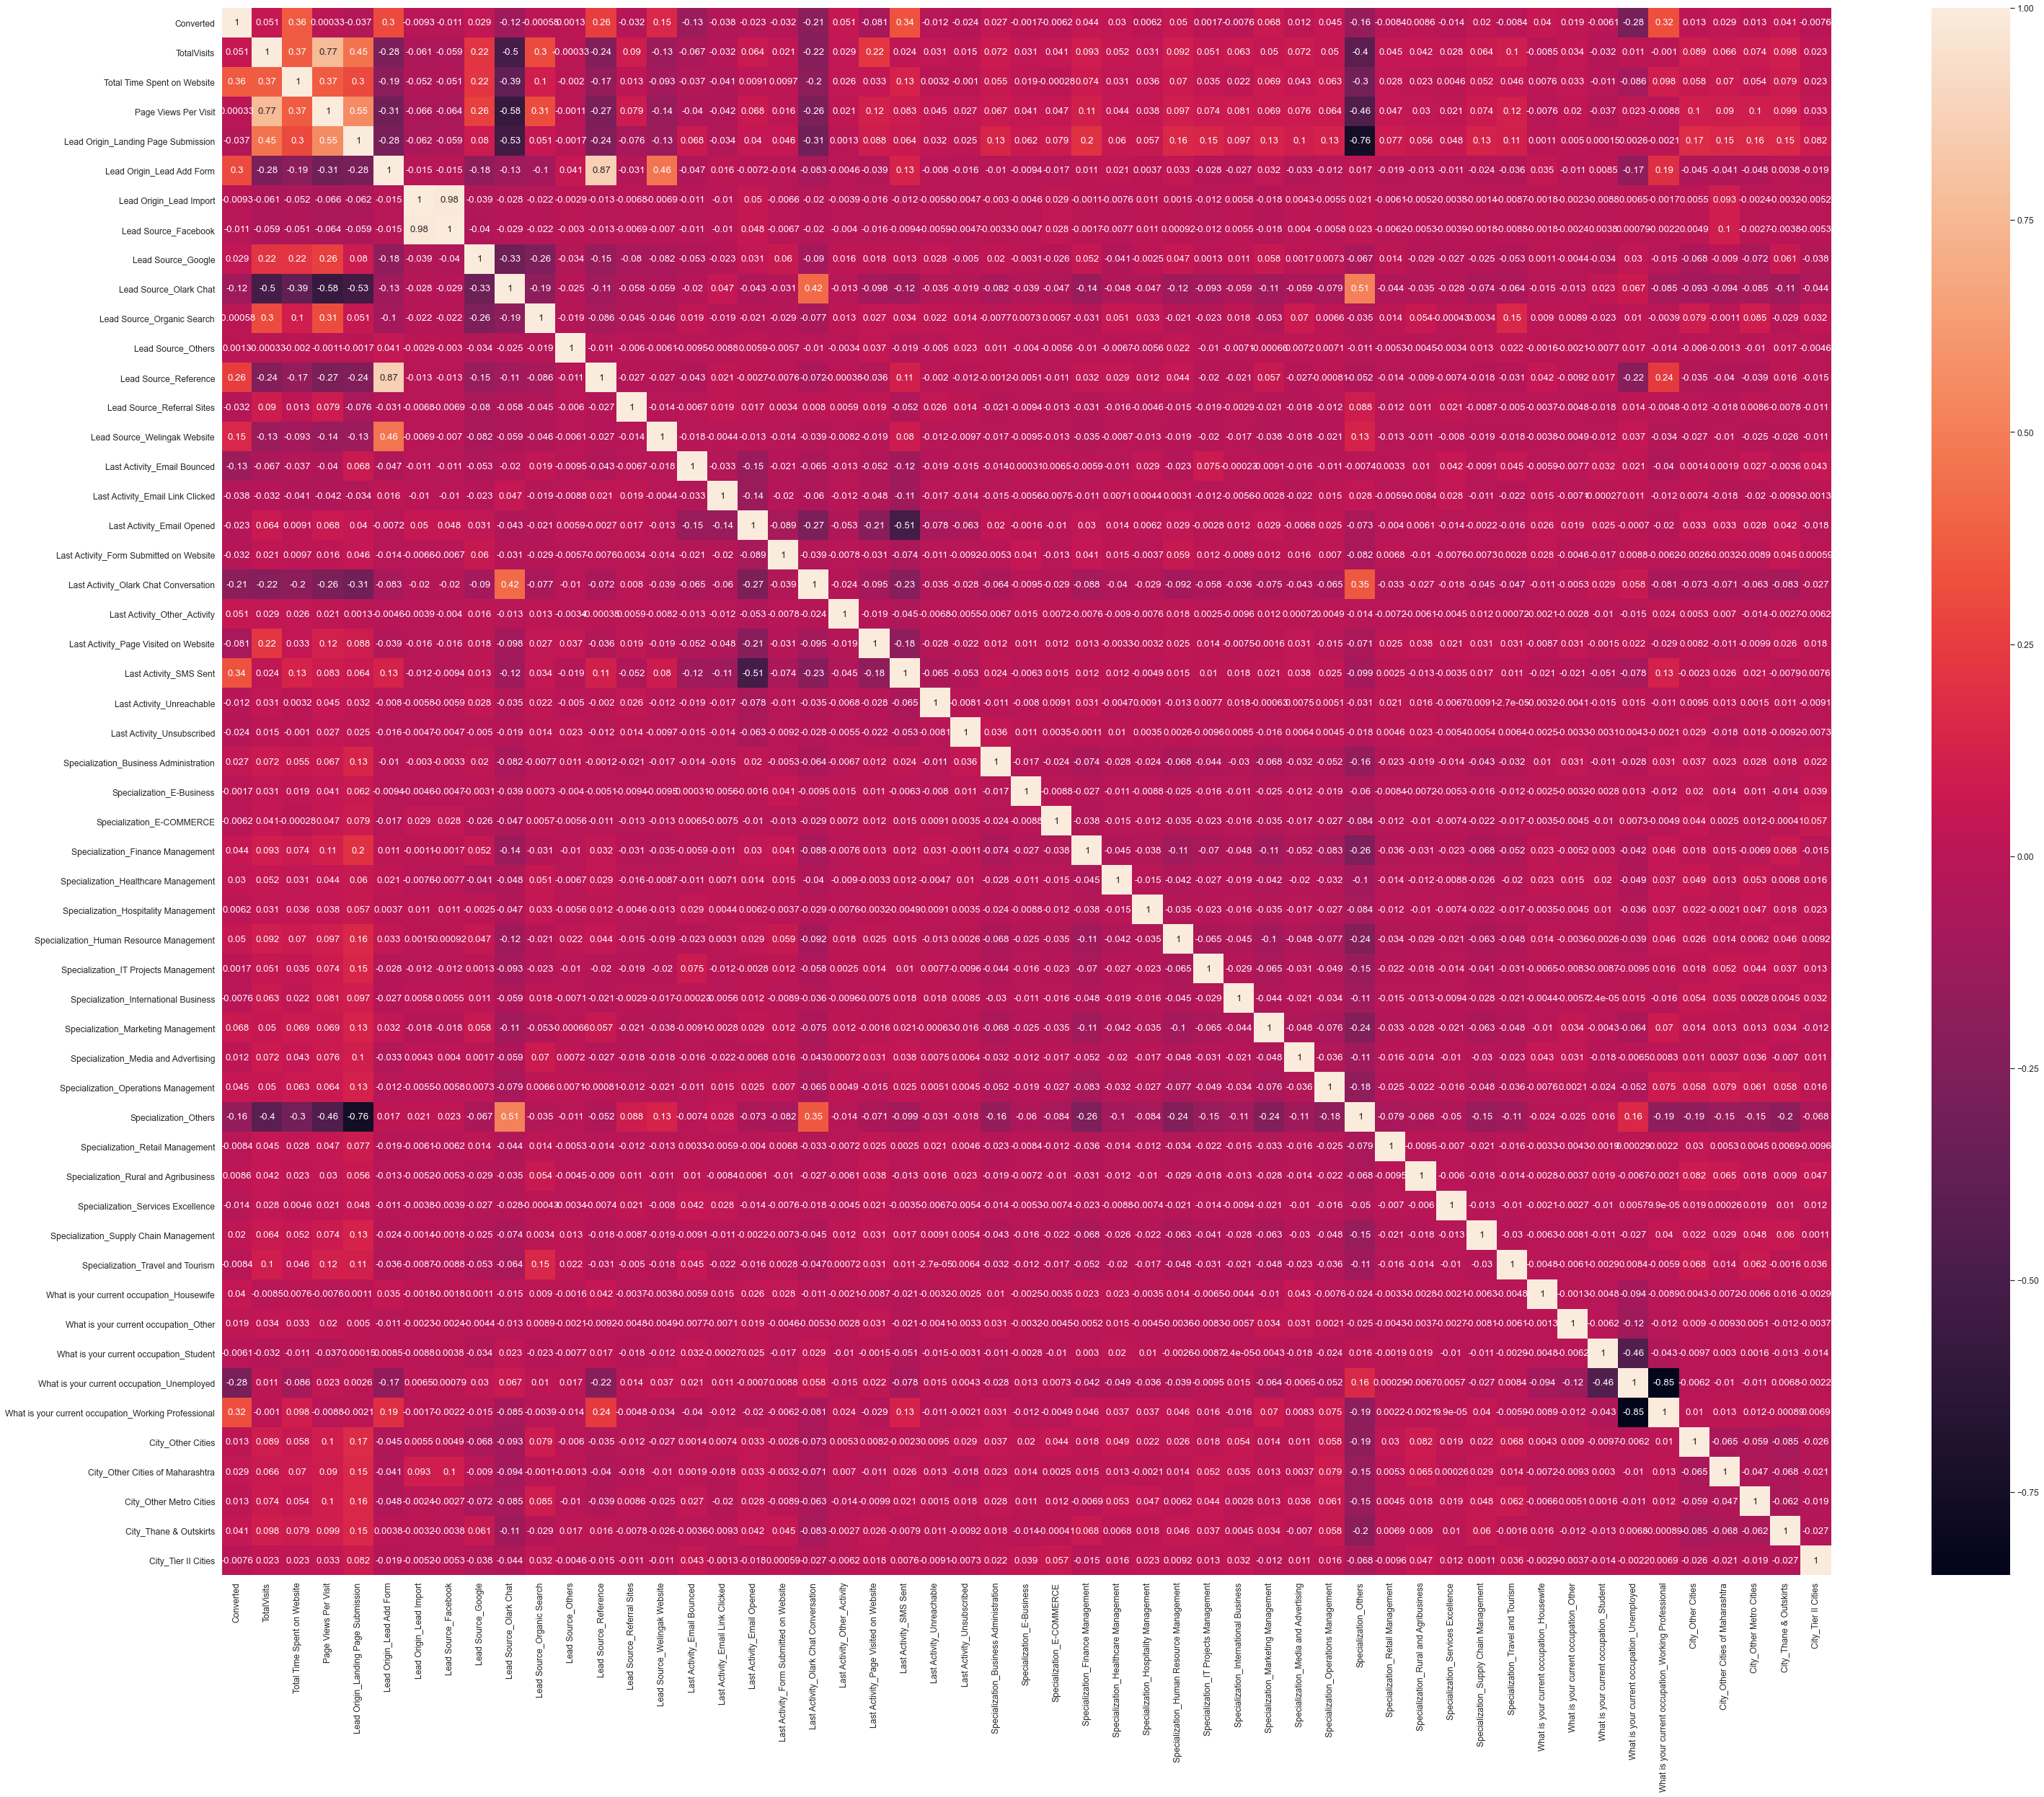

In [64]:
plt.figure(figsize = (50,40))
sns.heatmap(master_leads.corr(),annot = True)
plt.show()

### To check for high correlation we find variables with correlation greater than 0.5

In [65]:
c_index = []
c_columns = []
c_value = []
for row in master_leads.columns:
    for column in master_leads.columns:
        if row != column:
            _ = master_leads[row].corr(master_leads[column])
            if _ > 0.5:
                
                if row < column:
                    c_index.append(row)
                    c_columns.append(column)
                    c_value.append(_)
                    
                else:
                    c_index.append(column)
                    c_columns.append(row)
                    c_value.append(_)
                    

In [66]:
correlation_mat = pd.DataFrame([c_index,c_columns,c_value]).T.rename(columns={0:'Variable 1',1:'Variable 2',2:'Coefficient'})
correlation_mat = correlation_mat[correlation_mat.duplicated(subset=['Variable 1'])]
correlation_mat

,Variable 1,Variable 2,Coefficient
1,Page Views Per Visit,TotalVisits,0.766567
3,Lead Origin_Landing Page Submission,Page Views Per Visit,0.554142
6,Lead Origin_Lead Import,Lead Source_Facebook,0.983684
8,Lead Origin_Lead Add Form,Lead Source_Reference,0.866191
9,Lead Source_Olark Chat,Specialization_Others,0.509466


## Train Test Data Split 

In [67]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# NUMERIC
num_data_master_leads=master_leads[list(master_leads.select_dtypes(numerics).columns)]
# CATEGORICAL 
cat_data_master_leads=master_leads[list(master_leads.select_dtypes(exclude=numerics).columns)]

print(num_data_master_leads.columns)
print(cat_data_master_leads.columns)

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')
Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specia

### Defining Y 

In [68]:
#Defining Y
Y = master_leads['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Defining X 

In [69]:
from sklearn.model_selection import train_test_split
X = master_leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=333)

### Sample Data of X_train Dataframe 

In [71]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,4.0,346,4.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8604,10.0,165,5.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2916,4.0,639,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
189,6.0,385,6.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3037,2.0,450,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [72]:
print ('The Shape of Data from X_train has {0} rows and {1} columns'.format(X_train.shape[0],X_train.shape[1])) 

The Shape of Data from X_train has 7259 rows and 52 columns


### Sample Data of X_test Dataframe

In [73]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1461,5.0,71,5.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7926,4.0,233,1.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1909,5.0,431,2.50,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8971,4.0,1557,4.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5310,4.0,101,4.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [74]:
print ('The Shape of Data from X_test has {0} rows and {1} columns'.format(X_test.shape[0],X_test.shape[1])) 

The Shape of Data from X_test has 1815 rows and 52 columns


### Sample Data of Y_train Dataframe 

In [75]:
Y_train.head()

9190    0
8604    0
2916    0
189     1
3037    0
Name: Converted, dtype: int64

In [76]:
Y_train.shape

(7259,)

### Sample Data of Y_test Dataframe 

In [77]:
Y_test.head()

1461    0
7926    0
1909    0
8971    1
5310    0
Name: Converted, dtype: int64

In [78]:
Y_test.shape

(1815,)

### Feature Scaling 

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,0.300780,-0.248789,0.976193,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8604,2.467531,-0.592599,1.534715,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2916,0.300780,0.307766,0.976193,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
189,1.023031,-0.174708,2.093237,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3037,-0.421470,-0.051241,-0.140852,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


# Model Building 

### Logistics Regression Model 1 

In [80]:
import statsmodels.api as sm

In [81]:
# Logistic regression model
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7206
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2962.3
Date:                Mon, 07 Dec 2020   Deviance:                       5924.7
Time:                        17:21:31   Pearson chi2:                 7.59e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2723      1.096     -0.248      0.804      -2.421       1.876
TotalVisits                                              0.3531      0.052      6.854      0.000       0.252       0.454
Total Time Spent on Website                              1.1303      0.038     29.727      0.000       1.056       1.205
Page Views Per Visit                                    -0.3466      0.058     -5.999      0.000      -0.460      -0.233
Lead Origin_Landing Page Submission                     -0.9320      0.129     -7.215      0.000      -1.185      -0.679
Lead Origin_Lead Add Form                                1.7801      0.966      1.844      0.065      -0.112       3.672
Lead Origin_Lead Import                                 21.6433   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -21.0046   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.3669      0.090      4.056      0.000       0.190       0.544
Lead Source_Olark Chat                                   1.4135      0.151      9.332      0.000       1.117       1.710
Lead Source_Organic Search                               0.2514      0.121      2.084      0.037       0.015       0.488
Lead Source_Others                                       0.5746      0.656      0.876      0.381      -0.711       1.861
Lead Source_Reference                                    1.8835      0.986      1.911      0.056      -0.048       3.815
Lead Source_Referral Sites                              -0.0834      0.328     -0.255      0.799      -0.726       0.559
Lead Source_Welingak Website                             5.1362      1.401      3.666      0.000       2.390       7.882
Last Activity_Email Bounced                             -0.9303      0.372     -2.501      0.012      -1.659      -0.201
Last Activity_Email Link Clicked                         0.7472      0.277      2.696      0.007       0.204       1.290
Last Activity_Email Opened                               1.0793      0.204      5.296      0.000       0.680       1.479
Last Activity_Form Submitted on Website                  0.4590      0.358      1.283      0.199      -0.242       1.160
Last Activity_Olark Chat Conversation                   -0.6731      0.256     -2.631      0.009      -1.175      -0.172
Last Activity_Other_Activity                             2.6731      0.516      5.181      0.000       1.662       3.684
Last Activity_Page Visited on Website                    0.3811      0.241      1.580      0.114      -0.092       0.854
Last Activity_SMS Sent                                   2

## Feature Selection Using RFE

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, Y_train)


In [83]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Others', False, 19),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 4),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 14),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 15),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsu

In [84]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [85]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excell

## Model Assesment 

### Logistics Regression Model 2 

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7240
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3013.9
Date:                Mon, 07 Dec 2020   Deviance:                       6027.9
Time:                        17:21:39   Pearson chi2:                 7.64e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0427      0.577     -0.074      0.941      -1.173       1.088
Total Time Spent on Website                              1.1348      0.037     30.399      0.000       1.062       1.208
Lead Origin_Landing Page Submission                     -1.1354      0.119     -9.515      0.000      -1.369      -0.902
Lead Origin_Lead Add Form                                1.9988      0.849      2.355      0.019       0.335       3.663
Lead Source_Olark Chat                                   1.1672      0.115     10.154      0.000       0.942       1.393
Lead Source_Reference                                    1.4100      0.870      1.621      0.105      -0.295       3.115
Lead Source_Welingak Website                             4.6745      1.322      3.536      0.000       2.084       7.265
Last Activity_Email Bounced                             -1.4042      0.325     -4.326      0.000      -2.041      -0.768
Last Activity_Email Opened                               0.6529      0.100      6.533      0.000       0.457       0.849
Last Activity_Olark Chat Conversation                   -1.0671      0.182     -5.870      0.000      -1.423      -0.711
Last Activity_Other_Activity                             2.3801      0.484      4.917      0.000       1.431       3.329
Last Activity_SMS Sent                                   1.7688      0.103     17.170      0.000       1.567       1.971
Last Activity_Unreachable                                0.6835      0.321      2.132      0.033       0.055       1.312
Specialization_Hospitality Management                   -0.5237      0.300     -1.744      0.081      -1.112       0.065
Specialization_Others                                   -1.1770      0.116    -10.162      0.000      -1.404      -0.950
What is your current occupation_Housewife               22.1122    1.5e+04      0.001      0.999   -2.94e+04    2.95e+04
What is your current occupation_Student                 -0.6508      0.610     -1.066      0.286      -1.847       0.545
What is your current occupation_Unemployed              -0.8733      0.570     -1.532      0.126      -1.991       0.244
What is your current occupation_Working Professional     1.8644      0.596      3.129      0.002       0.697       3.032
========================================================================================================================
"""

### Variance Inflation Factor - VIF 

In [87]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
2,Lead Origin_Lead Add Form,54.20
4,Lead Source_Reference,42.22
16,What is your current occupation_Unemployed,15.40
5,Lead Source_Welingak Website,12.87
1,Lead Origin_Landing Page Submission,7.22
13,Specialization_Others,4.63
7,Last Activity_Email Opened,3.33
10,Last Activity_SMS Sent,2.93
3,Lead Source_Olark Chat,2.39
17,What is your current occupation_Working Professional,2.09


####  Inference: What is your current occupation_Housewife having high P value though its VIF is low. So, Considering P value we are dropping the feature 

In [89]:
col1 = col.drop('What is your current occupation_Housewife',1)

In [90]:
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Reference',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Specialization_Hospitality Management',
 'Specialization_Others',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional']

### Logistic Regression Model 3

In [91]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7241
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3016.6
Date:                Mon, 07 Dec 2020   Deviance:                       6033.3
Time:                        17:21:40   Pearson chi2:                 7.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4686      0.534      0.877      0.381      -0.579       1.516
Total Time Spent on Website                              1.1335      0.037     30.381      0.000       1.060       1.207
Lead Origin_Landing Page Submission                     -1.1281      0.119     -9.461      0.000      -1.362      -0.894
Lead Origin_Lead Add Form                                2.0014      0.849      2.358      0.018       0.338       3.665
Lead Source_Olark Chat                                   1.1665      0.115     10.148      0.000       0.941       1.392
Lead Source_Reference                                    1.4127      0.870      1.624      0.104      -0.292       3.118
Lead Source_Welingak Website                             4.6713      1.322      3.534      0.000       2.081       7.262
Last Activity_Email Bounced                             -1.4019      0.325     -4.319      0.000      -2.038      -0.766
Last Activity_Email Opened                               0.6568      0.100      6.574      0.000       0.461       0.853
Last Activity_Olark Chat Conversation                   -1.0690      0.182     -5.874      0.000      -1.426      -0.712
Last Activity_Other_Activity                             2.3821      0.484      4.922      0.000       1.434       3.331
Last Activity_SMS Sent                                   1.7706      0.103     17.187      0.000       1.569       1.972
Last Activity_Unreachable                                0.6805      0.321      2.118      0.034       0.051       1.310
Specialization_Hospitality Management                   -0.5230      0.300     -1.742      0.081      -1.111       0.065
Specialization_Others                                   -1.1715      0.116    -10.120      0.000      -1.398      -0.945
What is your current occupation_Student                 -1.1701      0.569     -2.056      0.040      -2.285      -0.055
What is your current occupation_Unemployed              -1.3926      0.526     -2.648      0.008      -2.423      -0.362
What is your current occupation_Working Professional     1.3448      0.553      2.430      0.015       0.260       2.429
========================================================================================================================
"""

### Variance Inflation Factor - VIF 

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
2,Lead Origin_Lead Add Form,54.20
4,Lead Source_Reference,42.22
15,What is your current occupation_Unemployed,15.23
5,Lead Source_Welingak Website,12.87
1,Lead Origin_Landing Page Submission,7.17
13,Specialization_Others,4.61
7,Last Activity_Email Opened,3.31
10,Last Activity_SMS Sent,2.92
3,Lead Source_Olark Chat,2.39
16,What is your current occupation_Working Professional,2.08


#### Inference: Lead Source_Reference have High VIF values and the P value is also high . So we drop them


In [93]:
col1 = col1.drop('Lead Source_Reference',1)
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Specialization_Hospitality Management',
 'Specialization_Others',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional']

### Logistic Regression Model 4

In [94]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7242
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3017.7
Date:                Mon, 07 Dec 2020   Deviance:                       6035.4
Time:                        17:21:41   Pearson chi2:                 7.62e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4703      0.534      0.881      0.379      -0.576       1.517
Total Time Spent on Website                              1.1330      0.037     30.362      0.000       1.060       1.206
Lead Origin_Landing Page Submission                     -1.1264      0.119     -9.450      0.000      -1.360      -0.893
Lead Origin_Lead Add Form                                3.3571      0.221     15.205      0.000       2.924       3.790
Lead Source_Olark Chat                                   1.1643      0.115     10.125      0.000       0.939       1.390
Lead Source_Welingak Website                             3.3138      1.035      3.200      0.001       1.284       5.343
Last Activity_Email Bounced                             -1.4023      0.325     -4.321      0.000      -2.038      -0.766
Last Activity_Email Opened                               0.6562      0.100      6.569      0.000       0.460       0.852
Last Activity_Olark Chat Conversation                   -1.0686      0.182     -5.874      0.000      -1.425      -0.712
Last Activity_Other_Activity                             2.3817      0.484      4.922      0.000       1.433       3.330
Last Activity_SMS Sent                                   1.7701      0.103     17.186      0.000       1.568       1.972
Last Activity_Unreachable                                0.6817      0.321      2.123      0.034       0.052       1.311
Specialization_Hospitality Management                   -0.5172      0.300     -1.726      0.084      -1.105       0.070
Specialization_Others                                   -1.1684      0.116    -10.100      0.000      -1.395      -0.942
What is your current occupation_Student                 -1.1699      0.568     -2.058      0.040      -2.284      -0.056
What is your current occupation_Unemployed              -1.3956      0.525     -2.656      0.008      -2.425      -0.366
What is your current occupation_Working Professional     1.3431      0.553      2.429      0.015       0.259       2.427
========================================================================================================================
"""

### Variance Inflation Factor - VIF 

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
14,What is your current occupation_Unemployed,15.23
1,Lead Origin_Landing Page Submission,7.17
12,Specialization_Others,4.61
6,Last Activity_Email Opened,3.31
9,Last Activity_SMS Sent,2.92
3,Lead Source_Olark Chat,2.38
15,What is your current occupation_Working Professional,2.07
2,Lead Origin_Lead Add Form,1.99
7,Last Activity_Olark Chat Conversation,1.99
13,What is your current occupation_Student,1.38


####  Inference: Specialization_Hospitality Management has high P value 

In [96]:
col1 = col1.drop('Specialization_Hospitality Management',1)
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Specialization_Others',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional']

### Logistic Regression Model 5

In [97]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3019.2
Date:                Mon, 07 Dec 2020   Deviance:                       6038.4
Time:                        17:21:41   Pearson chi2:                 7.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4689      0.534      0.878      0.380      -0.577       1.515
Total Time Spent on Website                              1.1312      0.037     30.343      0.000       1.058       1.204
Lead Origin_Landing Page Submission                     -1.1207      0.119     -9.411      0.000      -1.354      -0.887
Lead Origin_Lead Add Form                                3.3429      0.220     15.170      0.000       2.911       3.775
Lead Source_Olark Chat                                   1.1637      0.115     10.122      0.000       0.938       1.389
Lead Source_Welingak Website                             3.3266      1.035      3.213      0.001       1.297       5.356
Last Activity_Email Bounced                             -1.4067      0.324     -4.340      0.000      -2.042      -0.771
Last Activity_Email Opened                               0.6553      0.100      6.561      0.000       0.460       0.851
Last Activity_Olark Chat Conversation                   -1.0713      0.182     -5.892      0.000      -1.428      -0.715
Last Activity_Other_Activity                             2.3860      0.484      4.933      0.000       1.438       3.334
Last Activity_SMS Sent                                   1.7688      0.103     17.179      0.000       1.567       1.971
Last Activity_Unreachable                                0.6702      0.320      2.093      0.036       0.043       1.298
Specialization_Others                                   -1.1551      0.115    -10.015      0.000      -1.381      -0.929
What is your current occupation_Student                 -1.1789      0.568     -2.075      0.038      -2.292      -0.065
What is your current occupation_Unemployed              -1.4059      0.525     -2.677      0.007      -2.435      -0.377
What is your current occupation_Working Professional     1.3232      0.553      2.395      0.017       0.240       2.406
========================================================================================================================
"""

### Variance Inflation Factor - VIF 

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
13,What is your current occupation_Unemployed,15.20
1,Lead Origin_Landing Page Submission,7.17
11,Specialization_Others,4.60
6,Last Activity_Email Opened,3.31
9,Last Activity_SMS Sent,2.92
3,Lead Source_Olark Chat,2.38
14,What is your current occupation_Working Professional,2.07
2,Lead Origin_Lead Add Form,1.99
7,Last Activity_Olark Chat Conversation,1.99
12,What is your current occupation_Student,1.38


In [99]:
col1 = col1.drop('What is your current occupation_Student',1)
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Specialization_Others',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional']

### Logistic Regression Model 6

In [100]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res6 = logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.5
Date:                Mon, 07 Dec 2020   Deviance:                       6042.9
Time:                        17:21:42   Pearson chi2:                 7.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5100      0.237     -2.154      0.031      -0.974      -0.046
Total Time Spent on Website                              1.1312      0.037     30.357      0.000       1.058       1.204
Lead Origin_Landing Page Submission                     -1.1331      0.119     -9.531      0.000      -1.366      -0.900
Lead Origin_Lead Add Form                                3.3389      0.220     15.156      0.000       2.907       3.771
Lead Source_Olark Chat                                   1.1590      0.115     10.085      0.000       0.934       1.384
Lead Source_Welingak Website                             3.3321      1.035      3.218      0.001       1.303       5.362
Last Activity_Email Bounced                             -1.4144      0.324     -4.366      0.000      -2.049      -0.779
Last Activity_Email Opened                               0.6554      0.100      6.568      0.000       0.460       0.851
Last Activity_Olark Chat Conversation                   -1.0675      0.181     -5.882      0.000      -1.423      -0.712
Last Activity_Other_Activity                             2.3853      0.484      4.931      0.000       1.437       3.333
Last Activity_SMS Sent                                   1.7674      0.103     17.174      0.000       1.566       1.969
Last Activity_Unreachable                                0.6802      0.319      2.136      0.033       0.056       1.305
Specialization_Others                                   -1.1696      0.115    -10.161      0.000      -1.395      -0.944
What is your current occupation_Unemployed              -0.4136      0.202     -2.045      0.041      -0.810      -0.017
What is your current occupation_Working Professional     2.3137      0.267      8.652      0.000       1.790       2.838
========================================================================================================================
"""

### Variance Inflation Factor - VIF 

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
12,What is your current occupation_Unemployed,11.37
1,Lead Origin_Landing Page Submission,5.86
11,Specialization_Others,4.01
6,Last Activity_Email Opened,3.10
9,Last Activity_SMS Sent,2.82
3,Lead Source_Olark Chat,2.33
7,Last Activity_Olark Chat Conversation,1.93
2,Lead Origin_Lead Add Form,1.87
13,What is your current occupation_Working Professional,1.81
4,Lead Source_Welingak Website,1.35


#### Inference : What is your current occupation_Unemployed has high VIF and high P value 

In [102]:
col1 = col1.drop('What is your current occupation_Unemployed',1)
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Specialization_Others',
 'What is your current occupation_Working Professional']

### Logistic Regression Model 7

In [103]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res7 = logm7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7245
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3023.5
Date:                Mon, 07 Dec 2020   Deviance:                       6047.0
Time:                        17:21:42   Pearson chi2:                 7.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9054      0.136     -6.643      0.000      -1.173      -0.638
Total Time Spent on Website                              1.1325      0.037     30.400      0.000       1.060       1.206
Lead Origin_Landing Page Submission                     -1.1383      0.119     -9.572      0.000      -1.371      -0.905
Lead Origin_Lead Add Form                                3.3532      0.220     15.236      0.000       2.922       3.785
Lead Source_Olark Chat                                   1.1632      0.115     10.125      0.000       0.938       1.388
Lead Source_Welingak Website                             3.3108      1.035      3.198      0.001       1.282       5.340
Last Activity_Email Bounced                             -1.4113      0.324     -4.353      0.000      -2.047      -0.776
Last Activity_Email Opened                               0.6562      0.100      6.578      0.000       0.461       0.852
Last Activity_Olark Chat Conversation                   -1.0615      0.181     -5.852      0.000      -1.417      -0.706
Last Activity_Other_Activity                             2.3734      0.484      4.907      0.000       1.425       3.321
Last Activity_SMS Sent                                   1.7581      0.103     17.110      0.000       1.557       1.960
Last Activity_Unreachable                                0.6739      0.318      2.121      0.034       0.051       1.297
Specialization_Others                                   -1.1782      0.115    -10.228      0.000      -1.404      -0.952
What is your current occupation_Working Professional     2.7147      0.182     14.905      0.000       2.358       3.072
========================================================================================================================
"""

### Variance Inflation Factor - VIF 

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
1,Lead Origin_Landing Page Submission,2.79
11,Specialization_Others,2.59
6,Last Activity_Email Opened,2.55
9,Last Activity_SMS Sent,2.38
3,Lead Source_Olark Chat,2.23
7,Last Activity_Olark Chat Conversation,1.81
2,Lead Origin_Lead Add Form,1.70
4,Lead Source_Welingak Website,1.34
0,Total Time Spent on Website,1.32
12,What is your current occupation_Working Professional,1.19


#### Inference: Last Activity_Unreachable has high P values though its VIF is low. We drop them considering the high P values 

In [105]:
col1 = col1.drop('Last Activity_Unreachable',1)
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_SMS Sent',
 'Specialization_Others',
 'What is your current occupation_Working Professional']

### Logistic Regression Model 8

In [106]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res8 = logm8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7246
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3025.6
Date:                Mon, 07 Dec 2020   Deviance:                       6051.2
Time:                        17:21:43   Pearson chi2:                 7.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8591      0.134     -6.409      0.000      -1.122      -0.596
Total Time Spent on Website                              1.1308      0.037     30.400      0.000       1.058       1.204
Lead Origin_Landing Page Submission                     -1.1384      0.119     -9.574      0.000      -1.371      -0.905
Lead Origin_Lead Add Form                                3.3565      0.220     15.257      0.000       2.925       3.788
Lead Source_Olark Chat                                   1.1611      0.115     10.111      0.000       0.936       1.386
Lead Source_Welingak Website                             3.3015      1.035      3.189      0.001       1.272       5.331
Last Activity_Email Bounced                             -1.4555      0.323     -4.502      0.000      -2.089      -0.822
Last Activity_Email Opened                               0.6114      0.097      6.313      0.000       0.422       0.801
Last Activity_Olark Chat Conversation                   -1.1051      0.180     -6.144      0.000      -1.458      -0.753
Last Activity_Other_Activity                             2.3281      0.483      4.820      0.000       1.381       3.275
Last Activity_SMS Sent                                   1.7131      0.100     17.152      0.000       1.517       1.909
Specialization_Others                                   -1.1803      0.115    -10.246      0.000      -1.406      -0.955
What is your current occupation_Working Professional     2.7130      0.182     14.899      0.000       2.356       3.070
========================================================================================================================
"""

#### Inference: Last Activity_Unreachable has high P values though its VIF is low. We drop them considering the high P values 

## Variance Inflation Factor -VIF 

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
1,Lead Origin_Landing Page Submission,2.70
10,Specialization_Others,2.55
6,Last Activity_Email Opened,2.49
9,Last Activity_SMS Sent,2.34
3,Lead Source_Olark Chat,2.23
7,Last Activity_Olark Chat Conversation,1.79
2,Lead Origin_Lead Add Form,1.69
4,Lead Source_Welingak Website,1.34
0,Total Time Spent on Website,1.32
11,What is your current occupation_Working Professional,1.19


####  Inference: Lead Source_Welingak Website has high P values though its VIF is low. We drop them considering the P values 

In [108]:
col1 = col1.drop('Lead Source_Welingak Website',1)
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_SMS Sent',
 'Specialization_Others',
 'What is your current occupation_Working Professional']

### Logistic Regression Model - 9

In [109]:
X_train_sm = sm.add_constant(X_train[col1])
logm9 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res9 = logm9.fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7247
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3038.7
Date:                Mon, 07 Dec 2020   Deviance:                       6077.5
Time:                        17:21:43   Pearson chi2:                 7.97e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9083      0.134     -6.774      0.000      -1.171      -0.645
Total Time Spent on Website                              1.1306      0.037     30.420      0.000       1.058       1.203
Lead Origin_Landing Page Submission                     -1.0897      0.119     -9.187      0.000      -1.322      -0.857
Lead Origin_Lead Add Form                                3.9061      0.212     18.395      0.000       3.490       4.322
Lead Source_Olark Chat                                   1.1547      0.115     10.082      0.000       0.930       1.379
Last Activity_Email Bounced                             -1.4049      0.315     -4.455      0.000      -2.023      -0.787
Last Activity_Email Opened                               0.6100      0.097      6.303      0.000       0.420       0.800
Last Activity_Olark Chat Conversation                   -1.0969      0.179     -6.131      0.000      -1.448      -0.746
Last Activity_Other_Activity                             2.3254      0.483      4.813      0.000       1.378       3.272
Last Activity_SMS Sent                                   1.7121      0.100     17.166      0.000       1.517       1.908
Specialization_Others                                   -1.1145      0.115     -9.692      0.000      -1.340      -0.889
What is your current occupation_Working Professional     2.7092      0.182     14.882      0.000       2.352       3.066
========================================================================================================================
"""

### Variance Inflation Factor - VIF 

In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
1,Lead Origin_Landing Page Submission,2.69
9,Specialization_Others,2.49
5,Last Activity_Email Opened,2.48
8,Last Activity_SMS Sent,2.33
3,Lead Source_Olark Chat,2.22
6,Last Activity_Olark Chat Conversation,1.79
2,Lead Origin_Lead Add Form,1.37
0,Total Time Spent on Website,1.32
10,What is your current occupation_Working Professional,1.18
4,Last Activity_Email Bounced,1.17


####  Inference - We witness the model 9 and there is no high P values at all and also the VIF is less then 5. So we keep this as the final model for evaluation 

## Coefficients 

In [111]:
round(res9.params.sort_values(ascending=False),4)

Lead Origin_Lead Add Form                               3.9061
What is your current occupation_Working Professional    2.7092
Last Activity_Other_Activity                            2.3254
Last Activity_SMS Sent                                  1.7121
Lead Source_Olark Chat                                  1.1547
Total Time Spent on Website                             1.1306
Last Activity_Email Opened                              0.6100
const                                                  -0.9083
Lead Origin_Landing Page Submission                    -1.0897
Last Activity_Olark Chat Conversation                  -1.0969
Specialization_Others                                  -1.1145
Last Activity_Email Bounced                            -1.4049
dtype: float64

In [112]:
# Getting the predicted values on the train set
Y_train_pred = res9.predict(X_train_sm)
Y_train_pred[:10]

9190    0.361901
8604    0.277711
2916    0.515530
189     0.097940
3037    0.414895
103     0.160821
2533    0.797485
4340    0.087061
1383    0.217135
6428    0.217135
dtype: float64

In [113]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.36190146, 0.27771103, 0.51552968, 0.09794047, 0.41489499,
       0.1608213 , 0.79748472, 0.08706103, 0.21713509, 0.21713509])

#### Creating  Dataframe with the actual Converted flag and the predicted probabilities

In [114]:
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Converted_prob':Y_train_pred})
Y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.361901
1,0,0.277711
2,0,0.515530
3,1,0.097940
4,0,0.414895


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0  

In [115]:
Y_train_pred_final['predicted'] = Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

Y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,0,0.361901,0
1,0,0.277711,0
2,0,0.515530,1
3,1,0.097940,0
4,0,0.414895,0


### Confusion Matrix 

In [116]:
from sklearn import metrics

# Confusion matrix 
Confusion_Mat = metrics.confusion_matrix(Y_train_pred_final.Converted, 
                                     Y_train_pred_final.predicted )
print(Confusion_Mat)

[[4009  494]
 [ 919 1837]]


## Overall Accuracy - Train 

In [117]:
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted))

0.8053450888552142


## Metrics - Train

In [118]:
#True positive 
TP = Confusion_Mat[1,1] 

#True negatives
TN = Confusion_Mat[0,0] 

#False positives
FP = Confusion_Mat[0,1] 

#False negatives
FN = Confusion_Mat[1,0]

### Sensitivity of our logistic regression model Train

In [119]:
print('Sensitivity of our logistic regression model :',TP / float(TP+FN))

Sensitivity of our logistic regression model : 0.6665457184325109


### Specificity of our logistic regression model Train

In [120]:
print('Specificity of our logistic regression model :',TN / float(TN+FP))

Specificity of our logistic regression model : 0.890295358649789


### Calculation of  false postive rate Train - predicting converted when lead has not converted

In [121]:
print('Calculation of False Positive Rate :',FP/ float(TN+FP))


Calculation of False Positive Rate : 0.10970464135021098


### Train Positive Predictive value 

In [122]:
print('Positive Predictive Value :',TP / float(TP+FP))

Positive Predictive Value : 0.788073788073788


### Train Negative Predictive Value 

In [123]:
print('Negative Predictive Value :',TN / float(TN+ FN))


Negative Predictive Value : 0.8135146103896104


## Plotting the ROC Curve
###### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(9,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Converted, 
                                         Y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

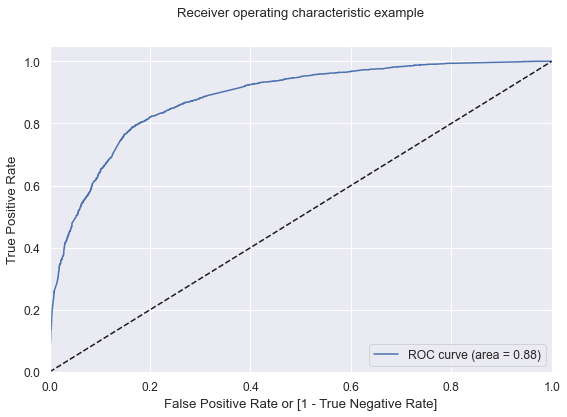

In [126]:
draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Converted_prob)

## Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [127]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.361901,0,1,1,1,1,0,0,0,0,0,0
1,0,0.277711,0,1,1,1,0,0,0,0,0,0,0
2,0,0.515530,1,1,1,1,1,1,1,0,0,0,0
3,1,0.097940,0,1,0,0,0,0,0,0,0,0,0
4,0,0.414895,0,1,1,1,1,1,0,0,0,0,0


### Calculation of accuracy sensitivity and specificity for various probability cutoffs.

In [128]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = Confusion_Mat[1,1] # true positive 
# TN = Confusion_Mat[0,0] # true negatives
# FP = Confusion_Mat[0,1] # false positives
# FN = Confusion_Mat[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.379667     1.000000     0.000000
0.1          0.1  0.609726     0.969158     0.389740
0.2          0.2  0.724204     0.924891     0.601377
0.3          0.3  0.796253     0.836720     0.771486
0.4          0.4  0.816641     0.780479     0.838774
0.5          0.5  0.805345     0.666546     0.890295
0.6          0.6  0.792947     0.589623     0.917388
0.7          0.7  0.781375     0.518868     0.942039
0.8          0.8  0.758507     0.414006     0.969354
0.9          0.9  0.712082     0.256168     0.991117


### Plotting  accuracy sensitivity and specificity for various probabilities.

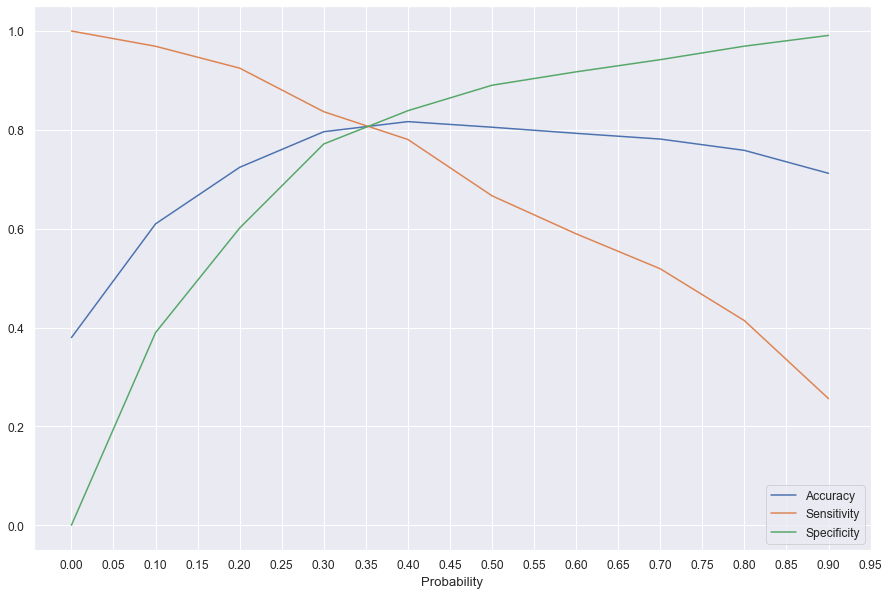

In [129]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'],figsize=(15,10))
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

### Inference :  From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [130]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

Y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.361901,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.277711,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.515530,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.097940,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.414895,0,1,1,1,1,1,0,0,0,0,0,1


## Overall accuracy Train After Cut off 

In [131]:
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.8094778895164623

In [132]:
Confusion_Mat2 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted )
Confusion_Mat2

array([[3651,  852],
       [ 531, 2225]], dtype=int64)

In [133]:
#True positive 
TP = Confusion_Mat2[1,1] 

#True negatives
TN = Confusion_Mat2[0,0] 

#False positives
FP = Confusion_Mat2[0,1] 

#False negatives
FN = Confusion_Mat2[1,0]

In [134]:
#Sensitivity
trainSensitivity=TP / float(TP+FN)
trainSensitivity

0.8073294629898403

In [135]:
#Specificity
trainSpecificity=TN / float(TN+FP)
trainSpecificity

0.8107928047968022

In [136]:
# Calculate false postive rate - predicting converted when lead has not converted
print(FP/ float(TN+FP))

0.18920719520319787


In [137]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7231069223269418


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8730272596843616


## Assigning Lead Score

In [139]:
Y_train_pred_final['Lead_Score_Train'] = Y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

Y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score_Train
0,0,0.361901,0,1,1,1,1,0,0,0,0,0,0,1,36
1,0,0.277711,0,1,1,1,0,0,0,0,0,0,0,0,28
2,0,0.515530,1,1,1,1,1,1,1,0,0,0,0,1,52
3,1,0.097940,0,1,0,0,0,0,0,0,0,0,0,0,10
4,0,0.414895,0,1,1,1,1,1,0,0,0,0,0,1,41


## Precesion and recall 

In [140]:
from sklearn.metrics import precision_score, recall_score
precision_train= precision_score(Y_train_pred_final.Converted , Y_train_pred_final.predicted)
precision_train

0.788073788073788

In [141]:
recall_train=recall_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)
recall_train

0.6665457184325109

In [142]:
trainF1_score_train= 2 * (precision_train * recall_train) / (precision_train + recall_train)
trainF1_score_train

0.7222331433064675

## Precision and recall tradeoff

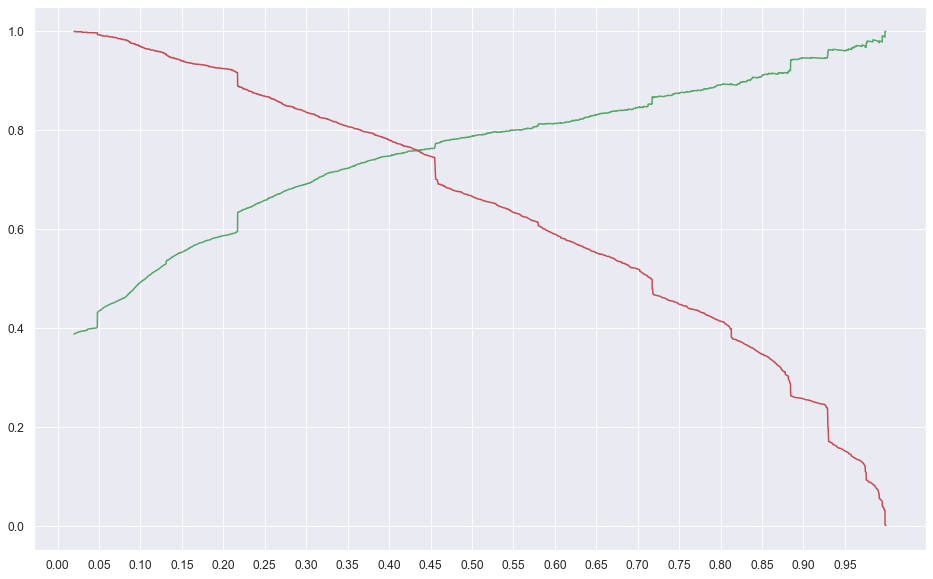

In [143]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Converted_prob)

plt.figure(figsize=(16,10))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

##### As per Precision-Recall Tradeoff, the cutoff is around 0.425 (between 0.4 and 0.45) . We can chooose the cut-off as 0.45| and use the Precision-Recall-Accuracy metrics to evaluate the model.

## Train Data - Statistics

### Accuracy  

In [144]:
trainaccuracy= metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)
trainaccuracy

0.8094778895164623

### Precision 

In [145]:
precision_train

0.788073788073788

### Recall

In [146]:
recall_train

0.6665457184325109

### F1 Score 

In [147]:
trainF1_score_train

0.7222331433064675

## Making predictions on the test set

### Scaling Features in the Test Data 

In [148]:
X_test[['TotalVisits','Total Time Spent on Website',
        'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                'Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1461,0.661905,-0.771152,1.534715,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7926,0.300780,-0.463433,-0.515062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1909,0.661905,-0.087331,0.138409,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8971,0.300780,2.051510,0.976193,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5310,0.300780,-0.714167,0.976193,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


### columns in Test Data 

In [149]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Sp

### Taking RFE support Cols from the last final model in train

In [150]:
X_test = X_test[col1]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional
1461,-0.771152,0,0,0,0,0,1,0,0,1,0
7926,-0.463433,0,0,0,0,0,1,0,0,1,0
1909,-0.087331,1,0,0,0,1,0,0,0,0,0
8971,2.051510,1,0,0,0,1,0,0,0,0,0
5310,-0.714167,1,0,0,0,0,0,0,1,0,0


### Check for the Shape of the Test Data

In [151]:
X_test.shape

(1815, 11)

### Adding Constant 

In [152]:
X_test_sm = sm.add_constant(X_test)

In [153]:
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional
1461,1.0,-0.771152,0,0,0,0,0,1,0,0,1,0
7926,1.0,-0.463433,0,0,0,0,0,1,0,0,1,0
1909,1.0,-0.087331,1,0,0,0,1,0,0,0,0,0
8971,1.0,2.051510,1,0,0,0,1,0,0,0,0,0
5310,1.0,-0.714167,1,0,0,0,0,0,0,1,0,0


In [154]:
X_test_sm.shape

(1815, 12)

### Predict Y_TEST 

In [155]:
Y_test_pred = res9.predict(X_test_sm)

In [156]:
Y_test_pred[:10]

1461    0.018135
7926    0.025489
1909    0.184416
8971    0.717387
5310    0.250999
4774    0.217135
2084    0.217135
6351    0.159462
335     0.929784
8202    0.217085
dtype: float64

### Converting y_pred to a dataframe which is an array

In [157]:

Y_test_pred = pd.DataFrame(Y_test_pred)
Y_test_pred.head()

,0
1461,0.018135
7926,0.025489
1909,0.184416
8971,0.717387
5310,0.250999


### Converting y_test to dataframe

In [158]:
Y_test_df = pd.DataFrame(Y_test)

### Appending y_test_df and Y_test_pred

In [159]:

Y_pred_final = pd.concat([Y_test_df, Y_test_pred],axis=1)
Y_pred_final.head()

,Converted,0
1461,0,0.018135
7926,0,0.025489
1909,0,0.184416
8971,1,0.717387
5310,0,0.250999


### Renaming the column 

In [160]:

Y_pred_final= Y_pred_final.rename(columns={ 0 : 'Converted_prob'})
Y_pred_final.head()

,Converted,Converted_prob
1461,0,0.018135
7926,0,0.025489
1909,0,0.184416
8971,1,0.717387
5310,0,0.250999


### Lead scores for varying cut-off probability 

In [161]:
prob = []
potential_leads = []
for i in np.arange(0.05,1,0.05):
    prob.append(i)
    potential_leads.append(sum(Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)) + 
                           sum(Y_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)))
    projected_leads = pd.DataFrame([prob,potential_leads]).T.rename(columns={0:'Probability Cut-Off',1:'Projected Leads'})
    

In [162]:
projected_leads

,Probability Cut-Off,Projected Leads
0,0.05,7870.0
1,0.10,6739.0
2,0.15,5801.0
3,0.20,5381.0
4,0.25,4487.0
5,0.30,4117.0
6,0.35,3794.0
7,0.40,3537.0
8,0.45,3328.0
9,0.50,2891.0


In [163]:
Y_pred_final['final_predicted'] = Y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.45 else 0)

In [164]:
Y_pred_final['Lead_Score'] = Y_pred_final.Converted_prob.map( lambda x: round(x*100))



## Final Data after Prediction 

In [165]:
Y_pred_final.index = Y_pred_final.index.set_names(['Cust_Id'])
Y_pred_final.head()

,Converted,Converted_prob,final_predicted,Lead_Score
Cust_Id,,,,
1461,0,0.018135,0,2
7926,0,0.025489,0,3
1909,0,0.184416,0,18
8971,1,0.717387,1,72
5310,0,0.250999,0,25


## Test Data Statistics 

## Test Accuracy 

In [166]:
testaccuracy= metrics.accuracy_score(Y_pred_final.Converted, Y_pred_final.final_predicted)
testaccuracy

0.8154269972451791

## Confusion Matrix 

In [167]:
confusion2 = metrics.confusion_matrix(Y_pred_final.Converted, Y_pred_final.final_predicted )
confusion2

array([[993, 143],
       [192, 487]], dtype=int64)

## Sensitivity

In [168]:
# Let's see the sensitivity of our lmodel
testsensitivity=TP / float(TP+FN)
testsensitivity

0.8073294629898403

## Specificity

In [169]:
# Let us calculate specificity
testspecificity= TN / float(TN+FP)
testspecificity

0.8107928047968022

## Precesion 

In [170]:
precision= precision_score(Y_pred_final.Converted , Y_pred_final.final_predicted)
precision

0.773015873015873

## Recall

In [171]:
recall=recall_score(Y_pred_final.Converted , Y_pred_final.final_predicted)
recall

0.7172312223858616

## F1 Score 

In [172]:
testF1_score= 2 * (precision * recall) / (precision + recall)
testF1_score

0.7440794499618029

# Final Observation:

### Comparison of the values obtained for Train & Test:

In [173]:

print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainSensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainSpecificity*100),2)))
print("Train Data F1 Score    :{}  ".format(round((trainF1_score_train),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))
print("Test Data F1 Score     :{}  ".format(round((testF1_score),2)))

Train Data Accuracy    :80.95 %
Train Data Sensitivity :80.73 %
Train Data Specificity :81.08 %
Train Data F1 Score    :0.72  
Test Data Accuracy     :81.54 %
Test Data Sensitivity  :80.73 %
Test Data Specificity  :81.08 %
Test Data F1 Score     :0.74  


In [174]:
from sklearn.metrics import classification_report

## Classification Report 

In [175]:
print (classification_report(Y_train_pred_final['Converted'], Y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4503
           1       0.72      0.81      0.76      2756

    accuracy                           0.81      7259
   macro avg       0.80      0.81      0.80      7259
weighted avg       0.82      0.81      0.81      7259



## Selecting the coefficients of the selected features from our final model excluding the intercept 

In [176]:
pd.options.display.float_format = '{:.2f}'.format
new_params= round(res9.params.sort_values(ascending=False),2)
new_params

Lead Origin_Lead Add Form                               3.91
What is your current occupation_Working Professional    2.71
Last Activity_Other_Activity                            2.33
Last Activity_SMS Sent                                  1.71
Lead Source_Olark Chat                                  1.15
Total Time Spent on Website                             1.13
Last Activity_Email Opened                              0.61
const                                                  -0.91
Lead Origin_Landing Page Submission                    -1.09
Last Activity_Olark Chat Conversation                  -1.10
Specialization_Others                                  -1.11
Last Activity_Email Bounced                            -1.40
dtype: float64

In [177]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values(ascending=False)

Lead Origin_Lead Add Form                              100.00
What is your current occupation_Working Professional    69.31
Last Activity_Other_Activity                            59.59
Last Activity_SMS Sent                                  43.73
Lead Source_Olark Chat                                  29.41
Total Time Spent on Website                             28.90
Last Activity_Email Opened                              15.60
const                                                  -23.27
Lead Origin_Landing Page Submission                    -27.88
Last Activity_Olark Chat Conversation                  -28.13
Specialization_Others                                  -28.39
Last Activity_Email Bounced                            -35.81
dtype: float64

## Other Activity 

- 'Had a Phone Conversation', 
  'View in browser link Clicked', 
  'Visited Booth in Tradeshow',
  'Approached upfront',
  'Resubscribed to emails',
  'Email Received', 
  'Email Marked Spam']

In [178]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Origin_Lead Add Form                               11
What is your current occupation_Working Professional    10
Last Activity_Other_Activity                             9
Last Activity_SMS Sent                                   8
Lead Source_Olark Chat                                   7
Total Time Spent on Website                              6
Last Activity_Email Opened                               5
const                                                    4
Lead Origin_Landing Page Submission                      3
Last Activity_Olark Chat Conversation                    2
Specialization_Others                                    1
Last Activity_Email Bounced                              0
dtype: int64

<Figure size 864x576 with 0 Axes>

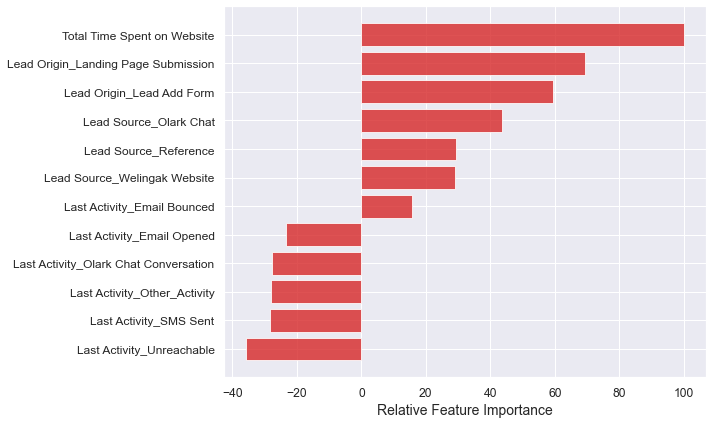

In [179]:
#Plot showing the feature variables based on their relative coefficient values
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()